# 1. Introduction

Nama : Rhesa Akbar Elvarettano

Batch :SBY-003

Objective: Dalam notebook ini untuk memenuhi graded Challenge 6, saya sebagai Data Scientist akan membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank

## Penjelasan Dataset

|**Column Name**|**Description**|
|:---:|:---:|
|CUST_ID|Identification of Credit Card holder|
|BALANCE|Balance amount left in their account to make purchases|
|BALANCE_FREQUENCY|How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
|PURCHASES|Amount of purchases made from account|
|ONEOFF_PURCHASES|Maximum purchase amount done in one-go|
|INSTALLMENTS_PURCHASES|Amount of purchase done in installment|
|CASH_ADVANCE|Cash in advance given by the user|
|PURCHASES_FREQUENCY|How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
|ONEOFF_PURCHASES_FREQUENCY| How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
|PURCHASES_INSTALLMENTS_FREQUENCY|How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
|CASH_ADVANCE_FREQUENCY|How frequently the cash in advance being paid|
|CASH_ADVANCE_TRX|Number of Transactions made with 'Cash in Advanced'|
|PURCHASES_TRX|Number of purchase transactions made|
|CREDIT_LIMIT|Limit of Credit Card for user|
|PAYMENTS|Amount of Payment done by user|
|MINIMUM_PAYMENTS|Minimum amount of payments made by user|
|PRC_FULL_PAYMENT|Percent of full payment paid by user|
|TENURE|Tenure of credit card service for user|

# 2. Query SQL

```sql
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_003_sby.credit-card-information` 
WHERE MOD(CUST_ID, 2) = 1;
```

Berikut merupakan query untuk mengambil dataset dari Google BigQuery pada Project ID : ftds-hacktiv8-project, Dataset Name: phase1_ftds_001_sby, Table Name : credit-card-information, dengan column CUST_ID bernilai ganjil. 

# 3. Import Libraries

In [1]:
# import library

import pandas as pd
import numpy as np
from scipy import stats

#Visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
# Import Sklearn

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from feature_engine.outliers import Winsorizer
import warnings
warnings.filterwarnings('ignore') #turn off warning
from sklearn.metrics import f1_score, classification_report, silhouette_score,silhouette_samples

# 4. Data Loading

In [3]:
# load data asli
df_ori = pd.read_csv('P1G6_Set_1_rhesaakbar.csv')

In [4]:
# Untuk berjaga jaga agar ada data asli
df = df_ori.copy()

In [5]:
# Menampilkan semua data dan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan dataset credit card
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       21

In [6]:
# Menampilkan 10 data pertama
df.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [7]:
# Menampilkan 10 data terakhir
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

In [8]:
# Menampilkan informasi mengenai tipe data dan jumlah data pada setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

**Statement** : Tipe data sudah benar dengan kolomnya, dapat dilihat bahwa tipe data ada integer dan float. Namun terdapat missing value pada kolom MINIMUM_PAYMENTS, sehingga nanti perlu di drop pada bab Feature Engineering.

In [9]:
# check duplicated data
df.duplicated().sum()

0

**Statement** : Ketika di cek data duplikat, nilainya 0 artinya tidak ada data yg duplikat

In [10]:
# check nilai unique pada setiap kolom dalam dataframe 
df.nunique()

CUST_ID                             4475
BALANCE                             4433
BALANCE_FREQUENCY                     43
PURCHASES                           3203
ONEOFF_PURCHASES                    2093
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2169
PURCHASES_FREQUENCY                   46
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
PAYMENTS                            4362
MINIMUM_PAYMENTS                    4319
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

**Statement** : Mengecek jumlah karakter dalam setiap kolom, paling banyak pada kolom CUST_ID, BALANCE, PAYMENTS & MINIMUM_PAYMENTS.

In [11]:
# Cek rangkuman statistik deskriptif
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           45.650000               88.620000      0.000000   
75%          575.220000              455.885000   1138.887754   
max        40624.060000            14686.100000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490579                    0.202301   
std               0.402907                    0.298203   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.250000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.363886                0.136132   
std                            0.397603                0.201036   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4475.000000   4475.000000   
mean           3.301229      14.929162   4494.878630   1740.075430   
std            7.134727      25.540814   3609.267706   2827.633858   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    376.913051   
50%            0.000000       7.000000   3000.000000    877.494612   
75%            4.000000      17.000000   6500.000000   1911.596530   
max          123.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4320.000000       4475.000000  4475.000000  
mean         873.976757          0.150224    11.518212  
std         2436.877272          0.289081     1.328925  
min            0.019163          0.000000     6.000000  
25%          168.590144          0.000000    12.000000  
50%          313.980229          0.000000    12.000000  
75%          819.371080          0.125000    12.000000  
max        76406.207520          1.000000    12.000000

**Dari informasi diatas dapat disimpulkan**:

- Feature PURCHASES atau jumlah pembelian yg telah dilakukan rata-rata 1003.251

- Feature BALANCE atau jumlah saldo yg tersisa di akun, maximum pada 18495.558 dengan rata-rata 1563.205.

- Feature CASH_ADVANCE_TRX artinya Jumlah Transaksi yang dilakukan dengan "Cash" maximum 123.000000 dan 
rata-rata 3.301	

- Feature CREDIT_LIMIT artinya batas kartu kredit untuk pengguna minimum dengan rata-rata 4494.878

- dst

# 5. Exploratory Data Analysis (EDA)

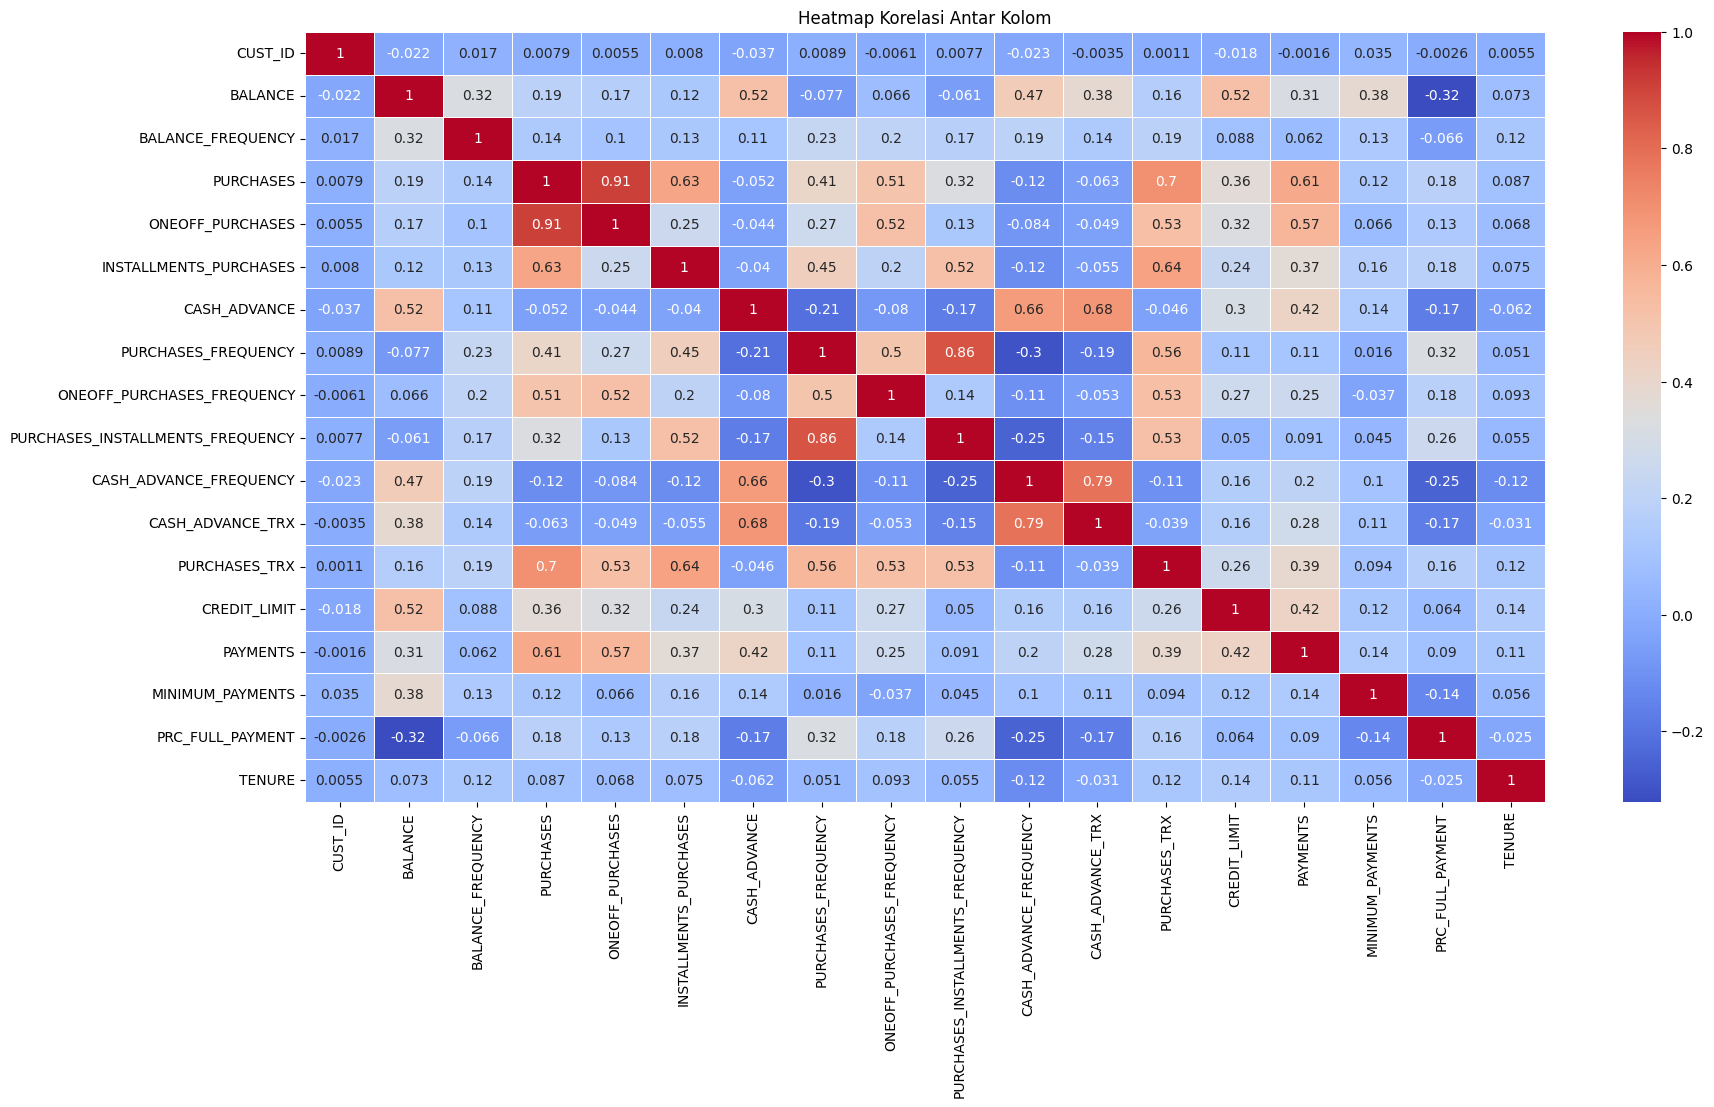

In [12]:
# Menghitung matriks korelasi untuk antar kolom
correlation_matrix = df.corr()
# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

**Statement** : Pada heatmap ini bertujuan untuk melihat korelasi semua kolom dengan kolom, hasilnya:

- Terdapat korelasi positif yang besar antara kolom PURCHASES dengan ONEOFF_PURCHASE sebesar 0.91

- Terdapat korelasi positif yang besar antara kolom PURCHASES_FREQUENCY dengan PURCHASES_INSTALLMENTS_FREQUENCY sebesar 0.86

- Terdapat korelasi positif yang besar antara kolom CASH_ADVANCE_TRX dengan CASH_ADVANCE_FREQUENCY sebesar 0.79

- Kolom CUST_ID memiliki korelasi paling kecil dengan kolom-kolom yg lainnya.

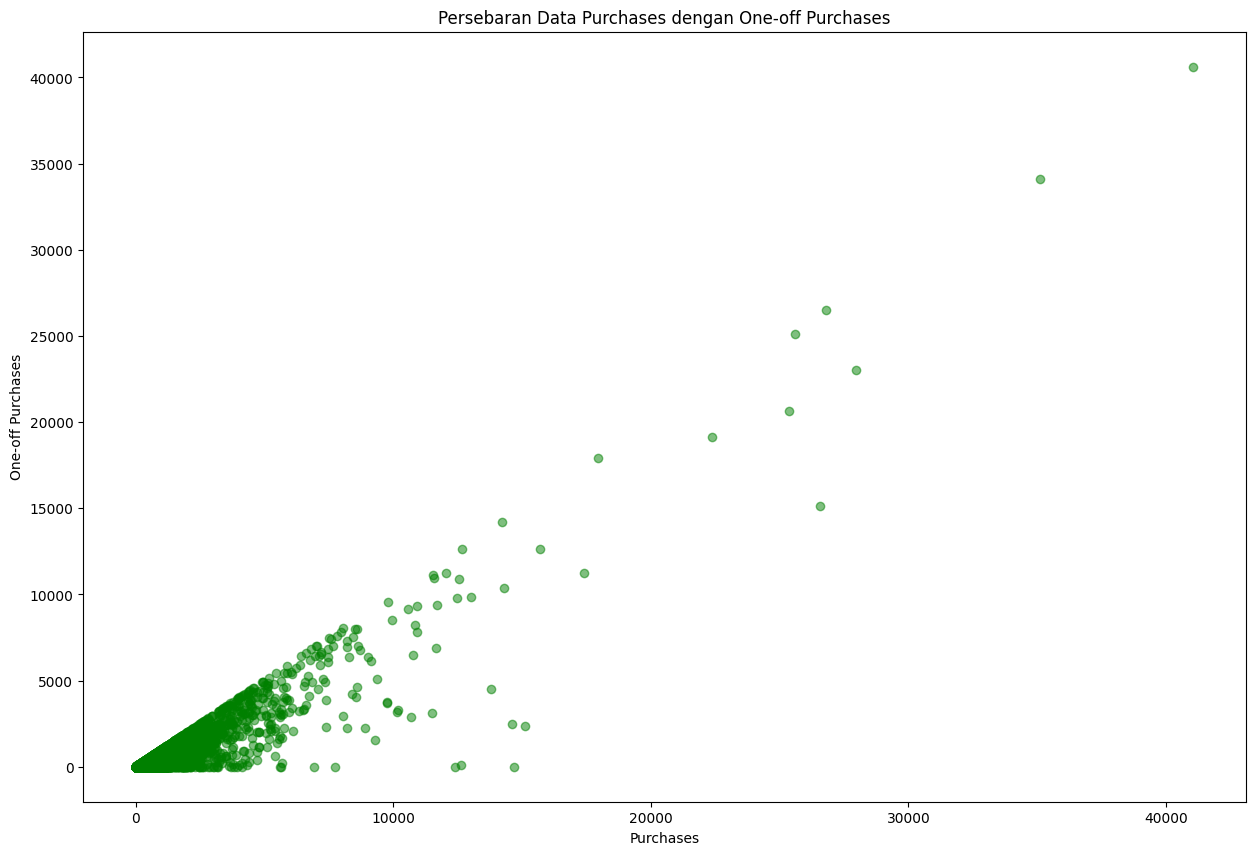

In [13]:
# Visualisasi hubungan antara PURCHASES dan ONEOFF_PURCHASES
plt.figure(figsize=(15, 10))
plt.scatter(df['PURCHASES'], df['ONEOFF_PURCHASES'], alpha=0.5, color= 'green')
plt.title('Persebaran Data Purchases dengan One-off Purchases')
plt.xlabel('Purchases')
plt.ylabel('One-off Purchases')
plt.show()

**Statement** : 
- Dari visualisasi diatas menunjukkan kemungkinan bahwa seiring bertambahnya nilai jumlah pembelian, kemungkinan besar nilai jumlah pembelian satu kali juga meningkat.

- Dapat mempertimbangkan untuk melakukan segmentasi customer berdasarkan pola visualisasi diatas, seperti customer yang kemungkinan besar akan meningkatkan pembelian. Strategi pemasaran dapat disesuaikan dengan masing-masing segmen tersebut.

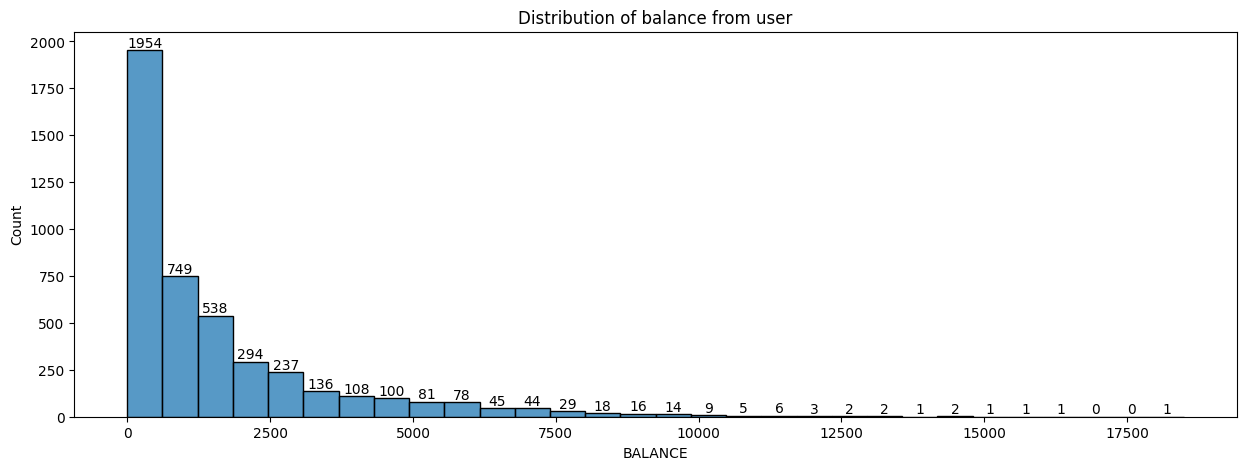

In [14]:
# Use barplot to show distribution data 
plt.figure(figsize=(15,5))
ax = sns.histplot(df.BALANCE,bins = 30)
plt.title('Distribution of balance from user')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Banyak user dalam hal ini memiliki saldo di kisaran 0 - 2500

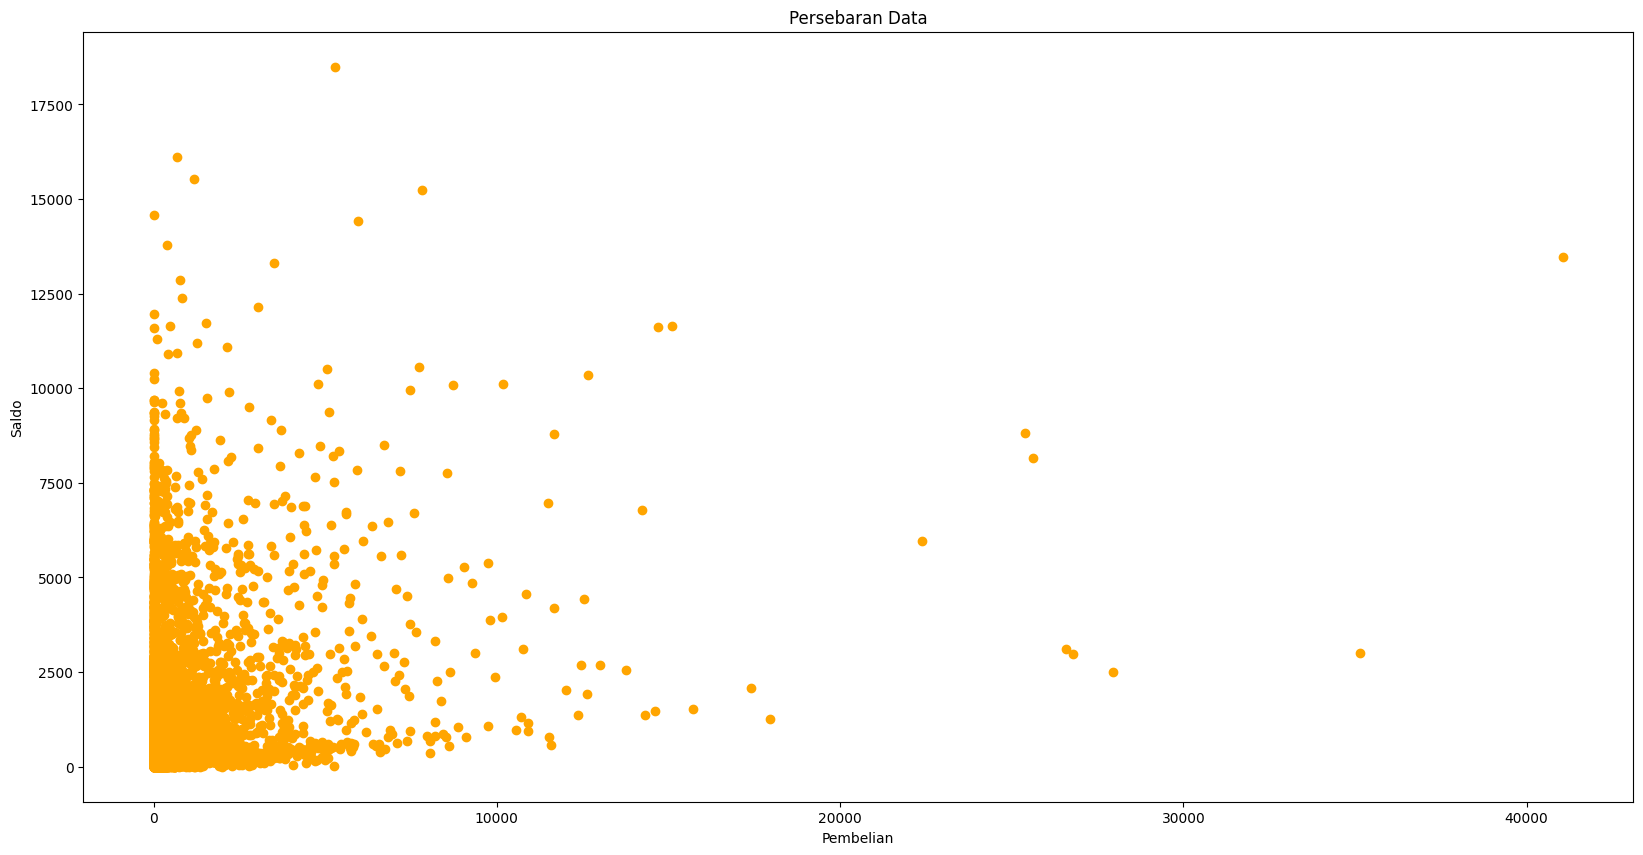

In [15]:
# Visualisasi hubungan antara kolom PURCHASES dengan BALANCE
plt.figure(figsize=(20, 10))
plt.scatter(df['PURCHASES'], df['BALANCE'], color='orange')
plt.title('Persebaran Data')
plt.xlabel('Pembelian')
plt.ylabel('Saldo')
plt.show()

Dari scatterplot kolom Balance dan Purchases diatas terlihat terdapat outlier artinya terdapat nasabah yang total pembeliannya besar, tapi sisa saldo kartu kredit yang masih bisa digunakan juga besar. Hal ini dapat terjadi karena PURCHASES dilakukan secara ONEOFF_PURCHASES (tagihannya langsung dibayarkan (lunas))

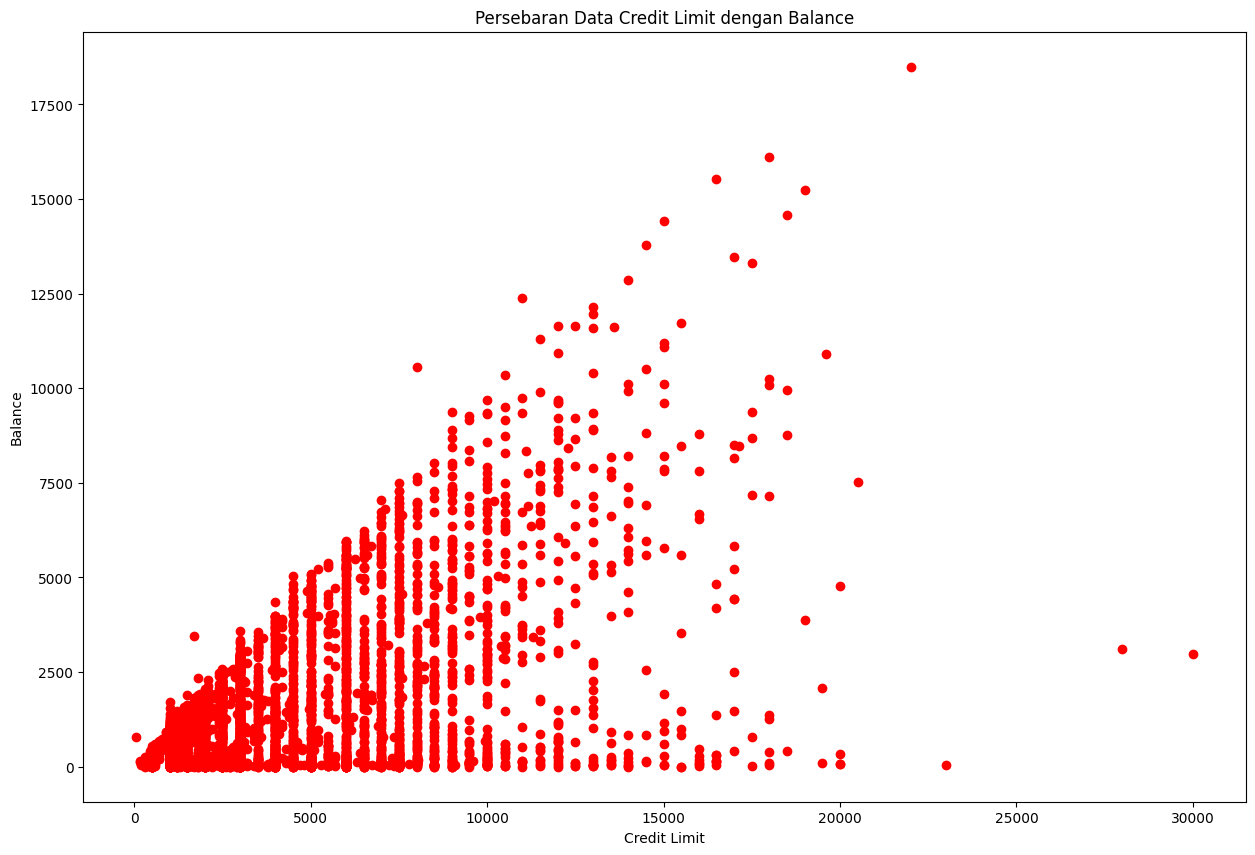

In [16]:
# Visualisasi hubungan antara kolom CREDIT_LIMIT dengan BALANCE
plt.figure(figsize=(15, 10))
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], color='red')
plt.title('Persebaran Data Credit Limit dengan Balance')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.show()

Dari persebaran data kecenderungan linier positif, itu dapat menunjukkan bahwa pelanggan dengan Credit Limit yang lebih tinggi cenderung memiliki saldo akun yang lebih tinggi.

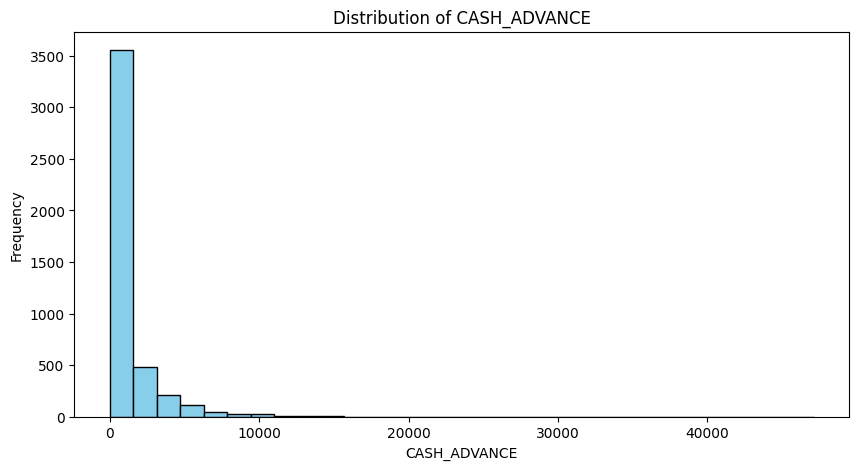

In [17]:
# Histogram untuk distribusi frekuensi CASH_ADVANCE
plt.figure(figsize=(10, 5))
plt.hist(df['CASH_ADVANCE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CASH_ADVANCE')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('Frequency')
plt.show()


Dari visualisasi distribusi data diatas bahwasanya tidak banyak customer melakukan uang muka

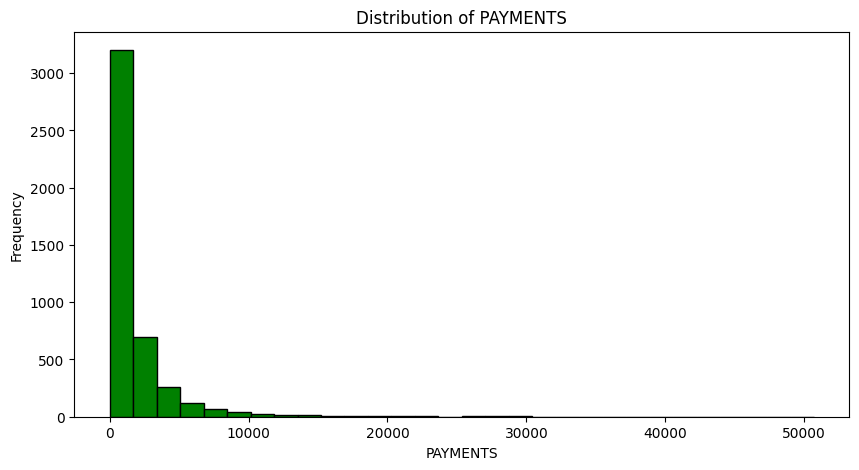

In [18]:
# Histogram untuk distribusi frekuensi PAYMENTS
plt.figure(figsize=(10, 5))
plt.hist(df['PAYMENTS'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of PAYMENTS')
plt.xlabel('PAYMENTS')
plt.ylabel('Frequency')
plt.show()

Dari visualisasi distribusi data diatas bahwasanya customer paling banyak melakukan pembayaran kecil dari pada pembayaran besar.

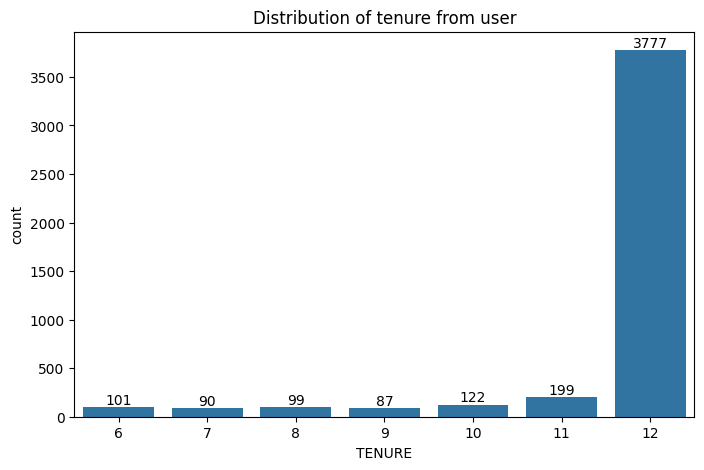

In [19]:
# Use barplot to show distribution data 
plt.figure(figsize=(8,5))
ax = sns.countplot(df,x='TENURE')
plt.title('Distribution of tenure from user')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Banyak user yang memiliki Tenure atau jangka waktu layanan kartu kreditnya dalam 12 bulan

# 6. Feature Engineering

## 6.1 - Feature Selection

In [20]:
# Drop feature CUST_ID

df.drop(columns=['CUST_ID'], axis=1, inplace=True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035

**Statement** : Pada Feature Selection dilakukan drop pada kolom CUST_ID karena nilai korelasinya dengan kolom lain kecil dan terlalu banyak nilai unik didalamnya.

## 6.2 - Handling Missing Values

In [21]:
# Cek missing value pada data
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Ketika di cek missing value pada setiap kolom, hasilnya terdapat missing value sebanyak 158 pada kolom `MINIMUM_PAYMENTS `.

In [22]:
# Hapus missing value pada kolom MINIMUM_PAYMENTS 
df.dropna(inplace=True)

In [23]:
# Cek missing value pada kolom MINIMUM_PAYMENTS 

df['MINIMUM_PAYMENTS'].isnull().sum()

0

Maka kemudian missing value dihapus, setelah dihapus dicek kembali missing value pada kolom `MINIMUM_PAYMENTS` dan hasil missing value bernilai 0 artinya sudah tidak ada missing value

## 6.3 -  Handling Outlier

In [24]:
# Dilakukan Cek Skewness

numeric_columns= df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]
numeric_columns.skew()

BALANCE                              2.306056
BALANCE_FREQUENCY                   -2.085656
PURCHASES                            6.982698
ONEOFF_PURCHASES                     9.827307
INSTALLMENTS_PURCHASES               6.252820
CASH_ADVANCE                         5.611537
PURCHASES_FREQUENCY                  0.030477
ONEOFF_PURCHASES_FREQUENCY           1.514243
PURCHASES_INSTALLMENTS_FREQUENCY     0.489101
CASH_ADVANCE_FREQUENCY               1.802858
CASH_ADVANCE_TRX                     6.352409
PURCHASES_TRX                        4.694067
CREDIT_LIMIT                         1.487941
PAYMENTS                             5.720099
MINIMUM_PAYMENTS                    14.669771
PRC_FULL_PAYMENT                     1.918902
TENURE                              -3.026040
dtype: float64

**Statement**: Distribusi normal akan memiliki kemencengan mulai dari `-0,5` hingga `0,5`. Distribusi di luar kisaran ini dianggap Skewed distribution

Normal Distribution: PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY

Skewed distribution: Semua kolom `skew` selain kolom PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY

In [25]:
# Membagi data yang distribusi normal dan distribusi skew 

df_nor = df[['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']]
df_skew = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
            'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [26]:
# Menampilkan dataframe yang distribusi normal

df_nor

PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY
2                0.125000                               0.0
3                0.125000                               0.0
4                0.125000                               0.0
5                0.125000                               0.0
7                0.125000                               0.0
...                   ...                               ...
4470             0.000000                               0.0
4471             0.000000                               0.0
4472             0.000000                               0.0
4473             0.000000                               0.0
4474             0.090909                               0.0

[4320 rows x 2 columns]

In [27]:
# Menampilkan dataframe yang distribusi skew

df_skew

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2      757.964752              0.875      157.4             157.4   
3      264.566591              0.375     1150.0            1150.0   
4      440.613643              1.000      600.0             600.0   
5      611.561026              1.000      765.0             765.0   
7      105.333584              0.375      306.0             306.0   
...           ...                ...        ...               ...   
4470  9629.808851              1.000        0.0               0.0   
4471  1040.030221              1.000        0.0               0.0   
4472  1322.818587              1.000        0.0               0.0   
4473  1060.391273              1.000        0.0               0.0   
4474  3447.674222              1.000      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
2                        0.0      0.000000                    0.125000   
3                        0.0      0.000000                    0.125000   
4                        0.0      0.000000                    0.125000   
5                        0.0      0.000000                    0.125000   
7                        0.0      0.000000                    0.125000   
...                      ...           ...                         ...   
4470                     0.0   4372.393835                    0.000000   
4471                     0.0   1390.648290                    0.000000   
4472                     0.0    762.301096                    0.000000   
4473                     0.0   1475.858013                    0.000000   
4474                     0.0   4548.057776                    0.090909   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
5      204.464151        146.352314               0.0       8  
7      101.986927        118.324082               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035.627320        312.835530               0.0      11  
4473   407.360560        277.084736               0.0      11  
4474   665.239171        817.844662               0.0      11  

[4320 rows x 15 columns]

In [28]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

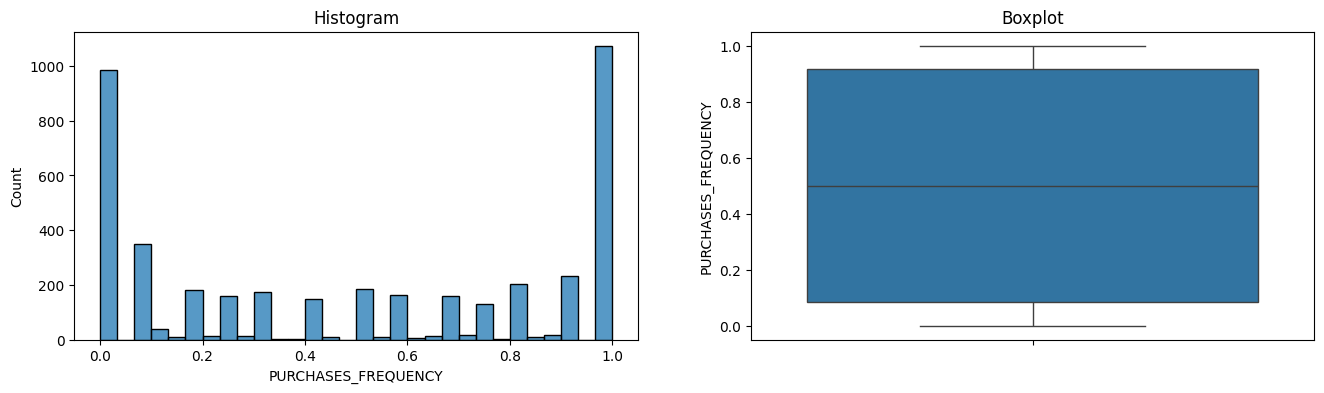

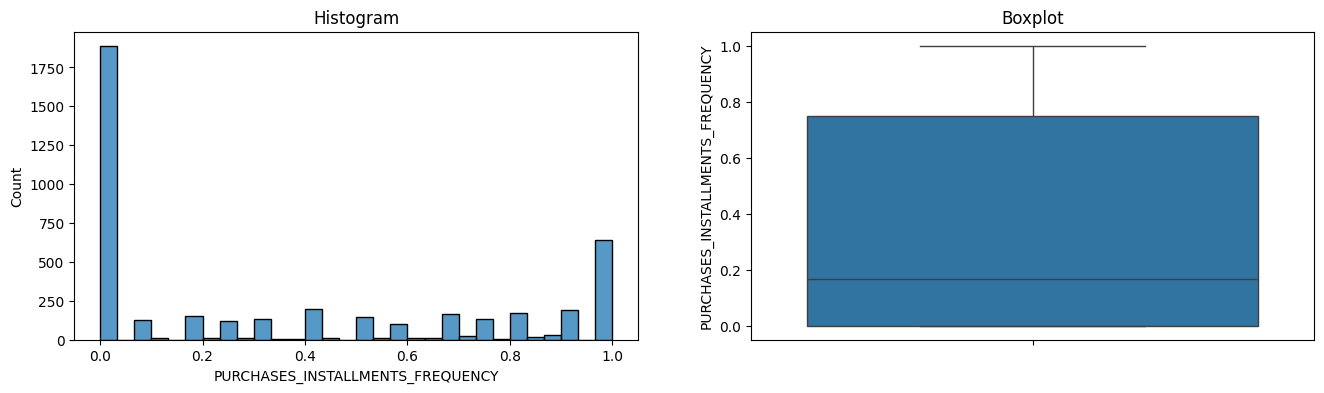

In [29]:
# Menampilkan visualisasi distribusi normal dengan boxplot
diagnostic_plots(df_nor, 'PURCHASES_FREQUENCY')
diagnostic_plots(df_nor, 'PURCHASES_INSTALLMENTS_FREQUENCY')

In [30]:
# First, capping the normal distribution

winsoriser_n = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'],
                            missing_values='ignore')

df_capped_n = winsoriser_n.fit_transform(df_nor)

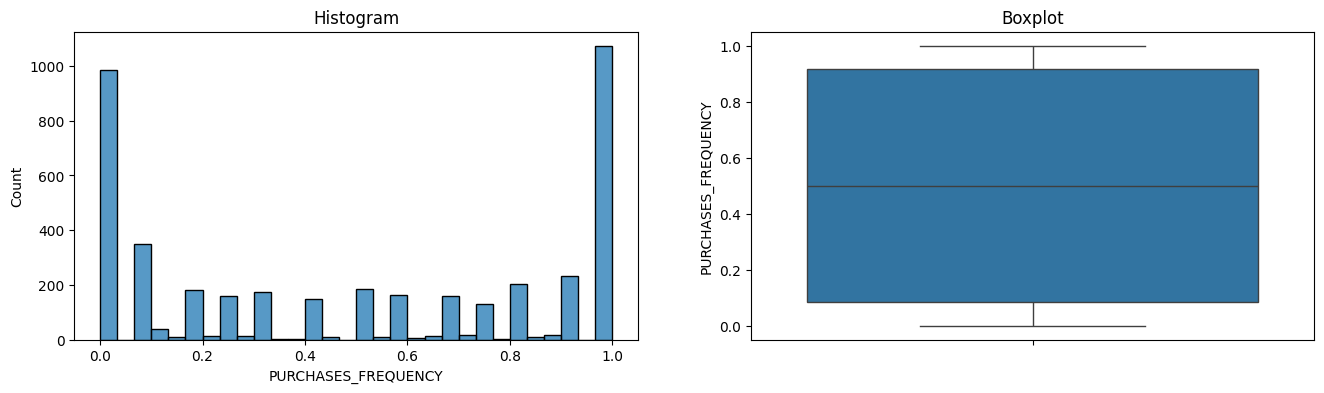

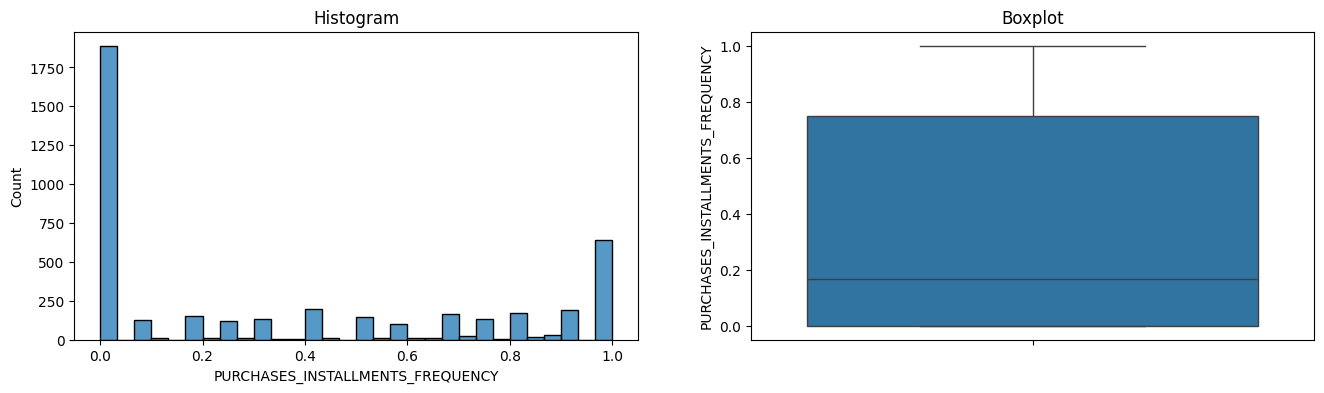

In [31]:
# Visualize after handling outlier
diagnostic_plots(df_capped_n, 'PURCHASES_FREQUENCY')
diagnostic_plots(df_capped_n, 'PURCHASES_INSTALLMENTS_FREQUENCY')

**Statement**: Dari kolom yang distribusi normal antara before and after capping tidak ada perbedeaan pada boxplot dan histogram karena untuk visualisasi untuk menunjukkan penetapan batas atas dan batas bawah.

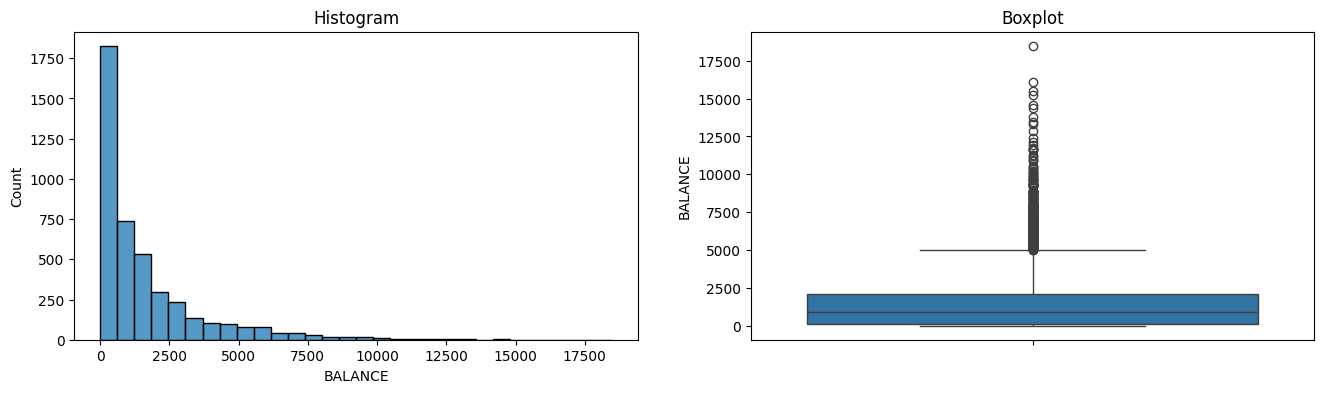

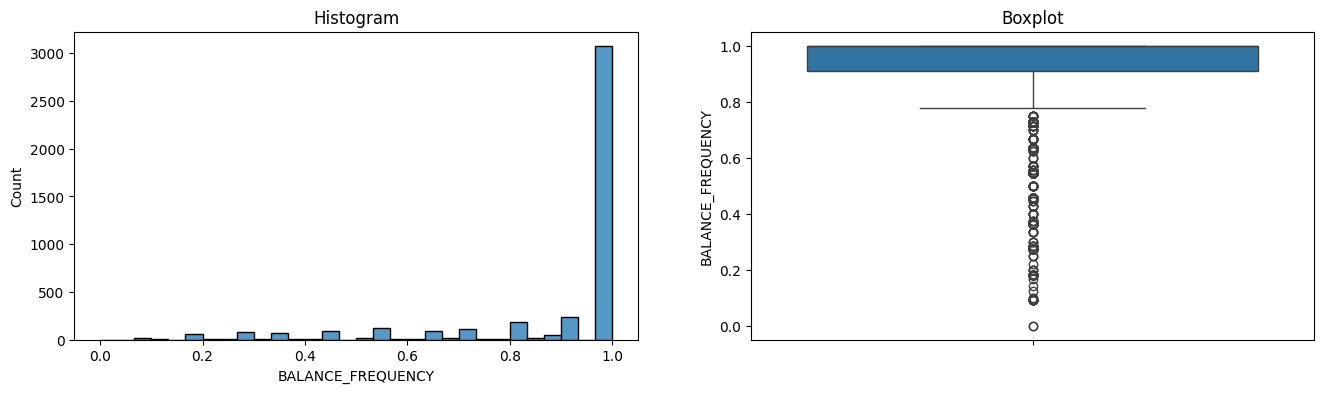

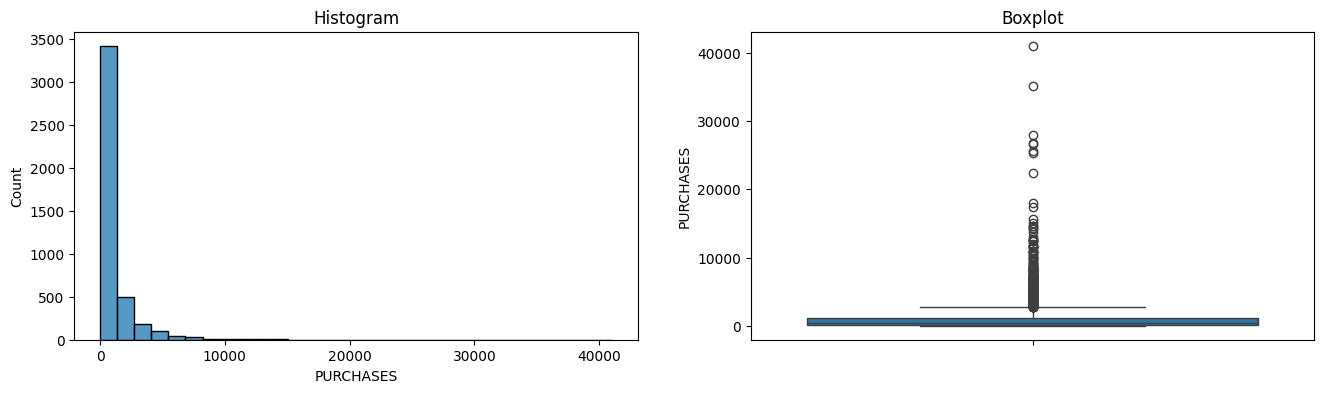

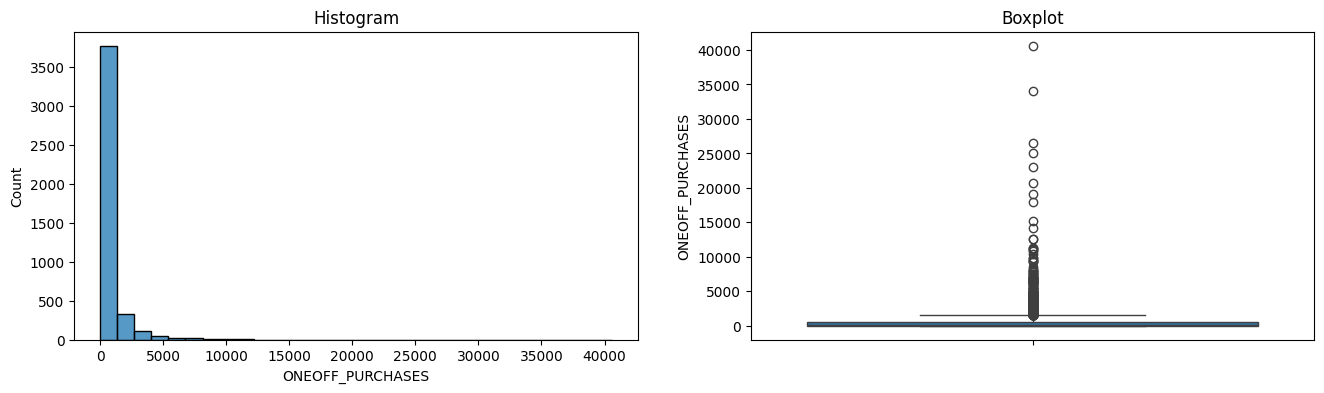

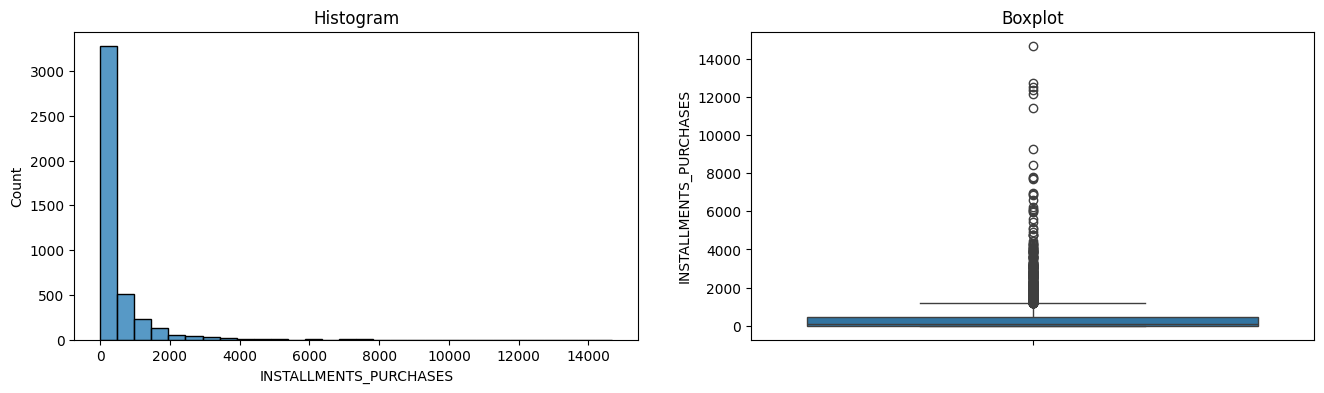

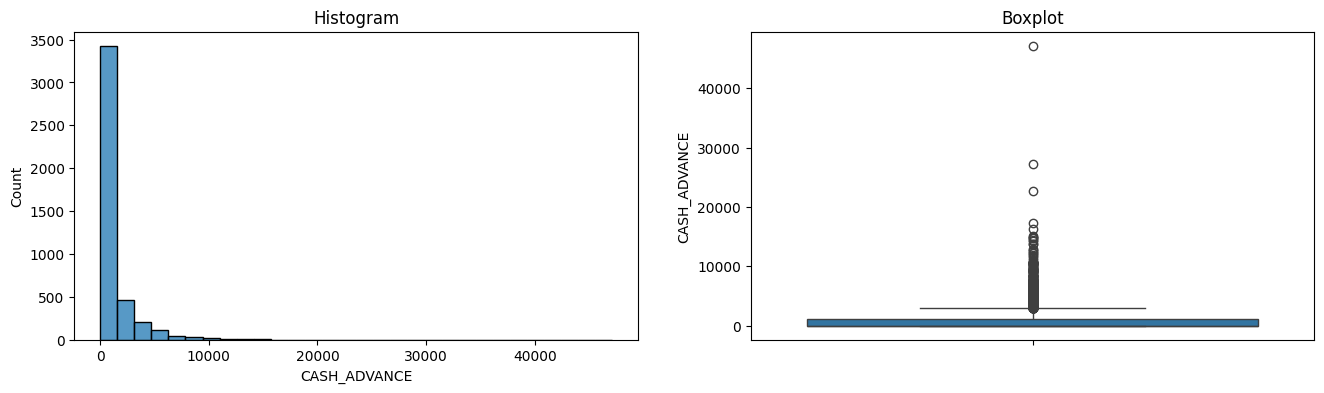

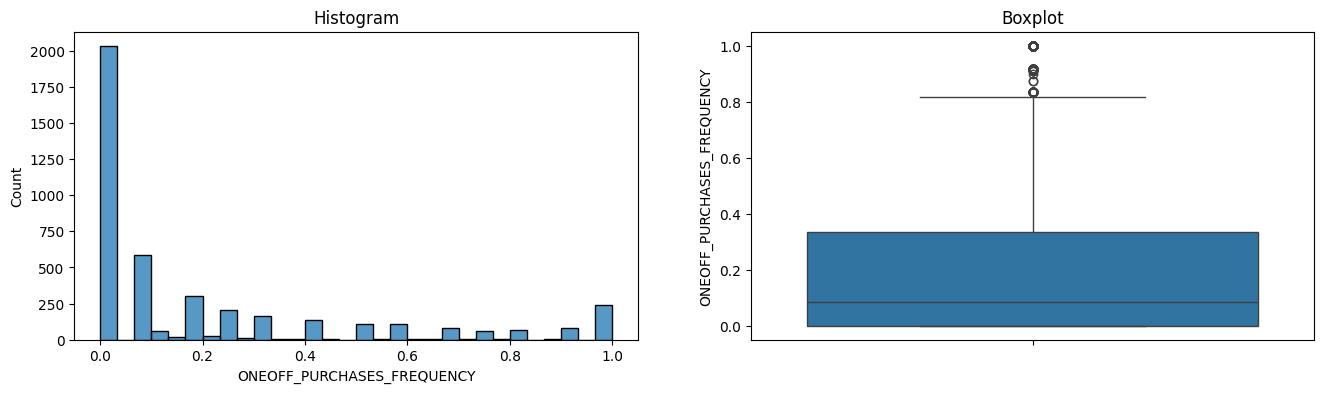

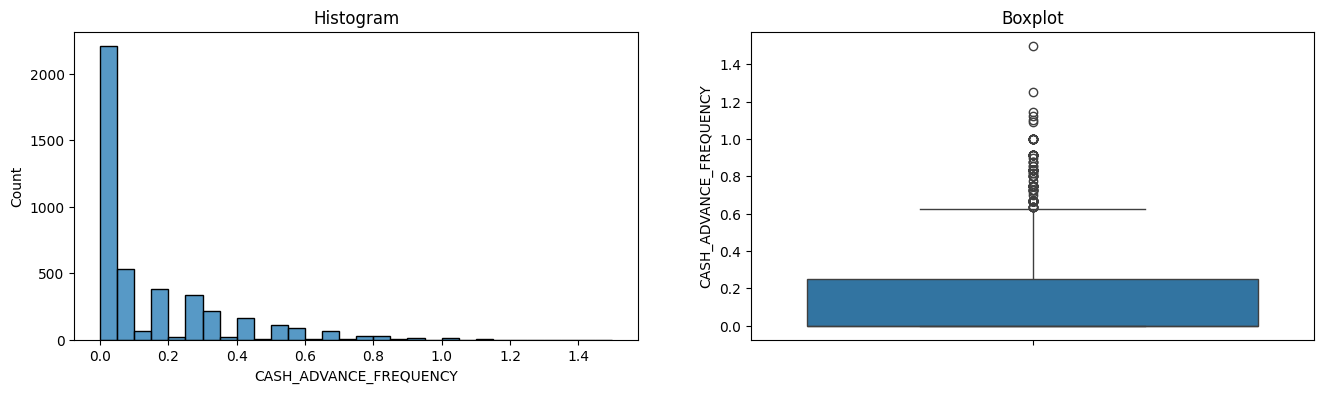

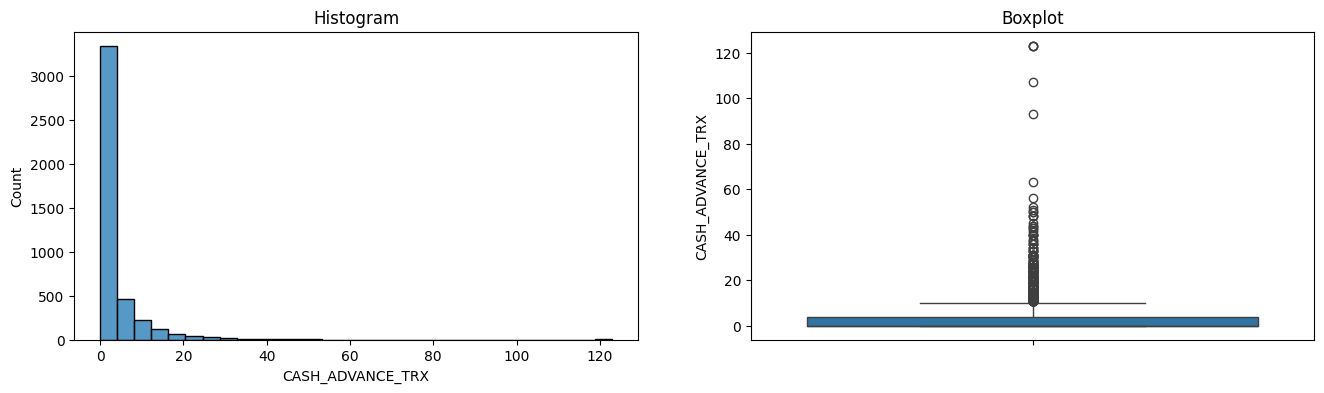

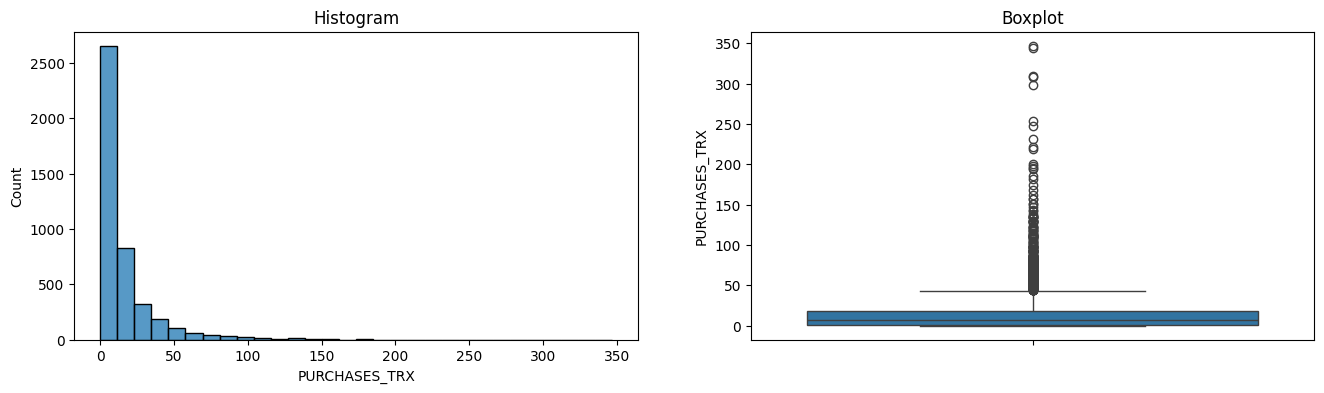

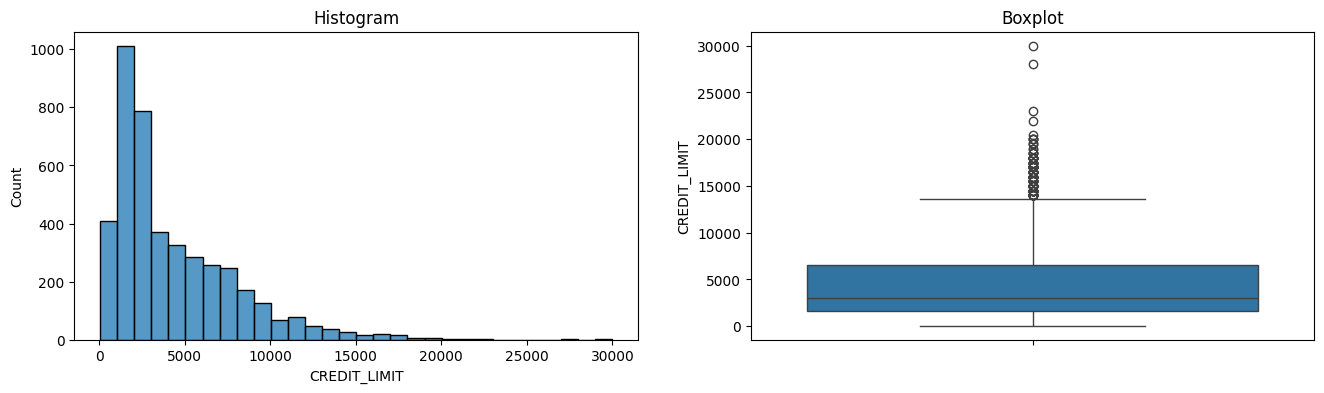

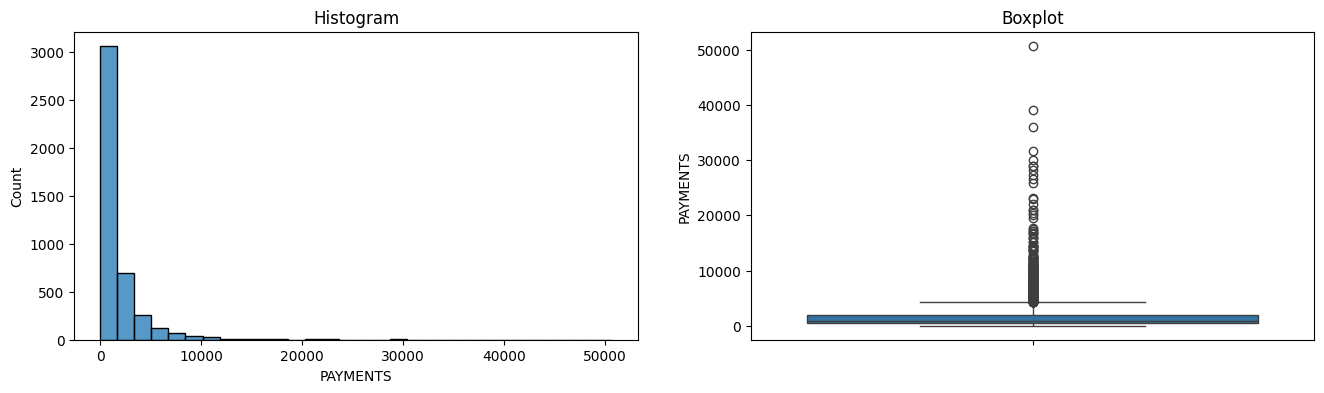

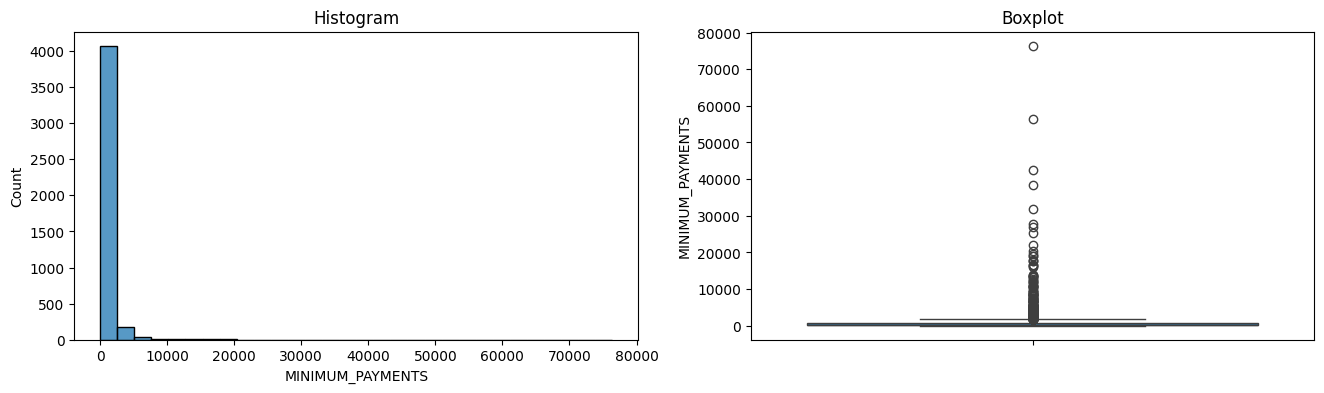

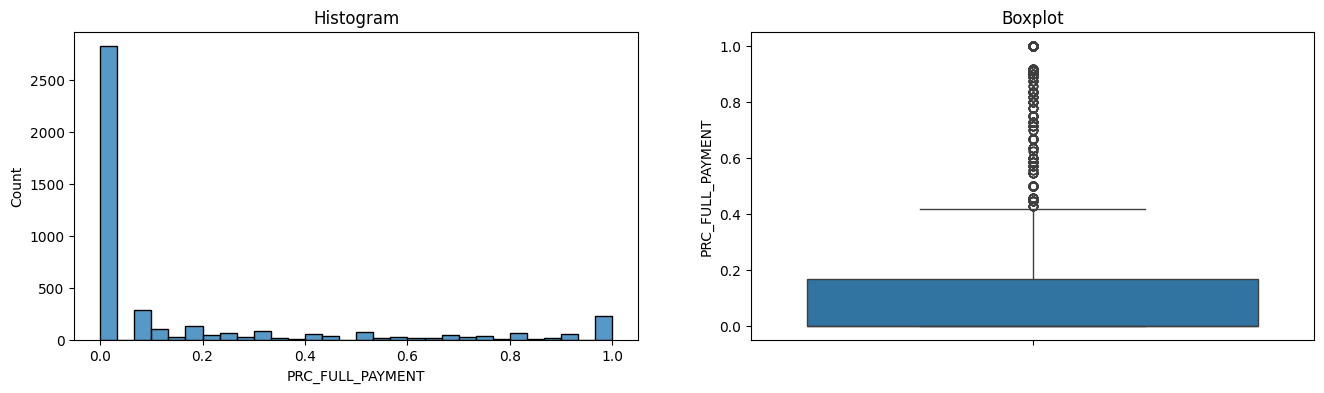

In [32]:
# Menampilkan visualisasi distribusi skew dengan boxplot before handling outlier
diagnostic_plots(df_skew, 'BALANCE')
diagnostic_plots(df_skew, 'BALANCE_FREQUENCY')
diagnostic_plots(df_skew, 'PURCHASES')
diagnostic_plots(df_skew, 'ONEOFF_PURCHASES')
diagnostic_plots(df_skew, 'INSTALLMENTS_PURCHASES')
diagnostic_plots(df_skew, 'CASH_ADVANCE')
diagnostic_plots(df_skew, 'ONEOFF_PURCHASES_FREQUENCY')
diagnostic_plots(df_skew, 'CASH_ADVANCE_FREQUENCY')
diagnostic_plots(df_skew, 'CASH_ADVANCE_TRX')
diagnostic_plots(df_skew, 'PURCHASES_TRX')
diagnostic_plots(df_skew, 'CREDIT_LIMIT')
diagnostic_plots(df_skew, 'PAYMENTS')
diagnostic_plots(df_skew, 'MINIMUM_PAYMENTS')
diagnostic_plots(df_skew, 'PRC_FULL_PAYMENT')

**Statement**: Dari kolom-kolom yang divisualisasikan diatas bahwa terdapat outlier yang tidak natural sehingga perlu dilakukan handling outlier

In [33]:
# Capping the skewed distribution

winsoriser_s = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
                                        'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                                        'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

df_capped_s = winsoriser_s.fit_transform(df_skew)

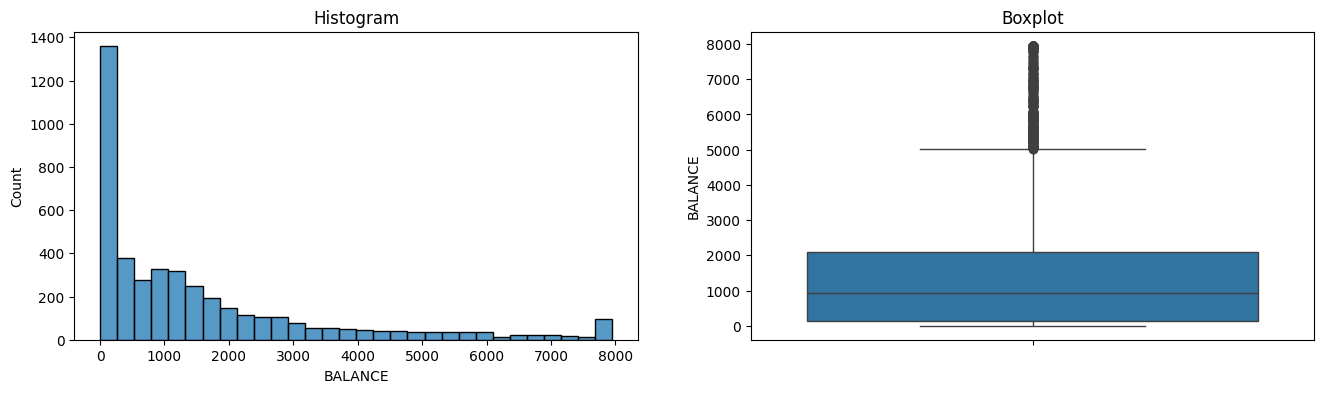

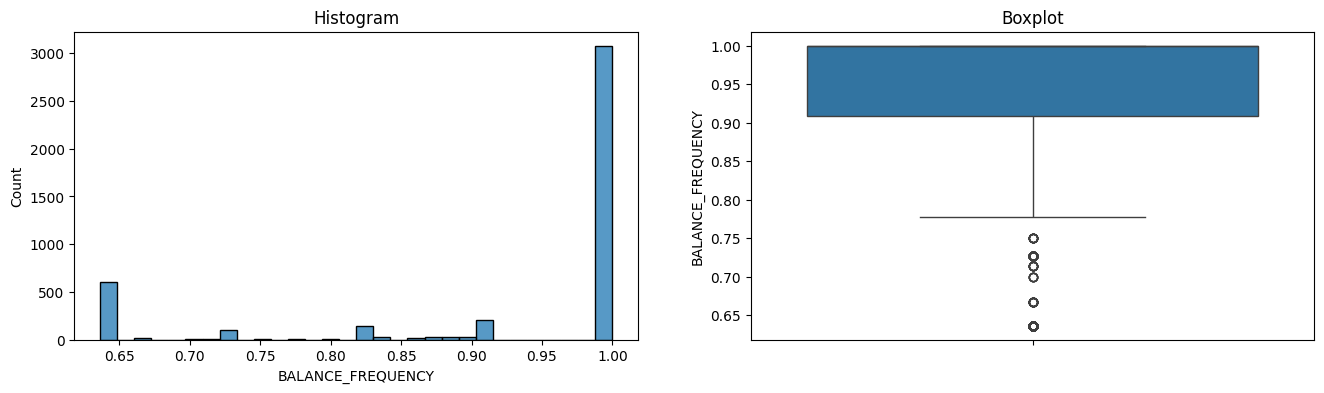

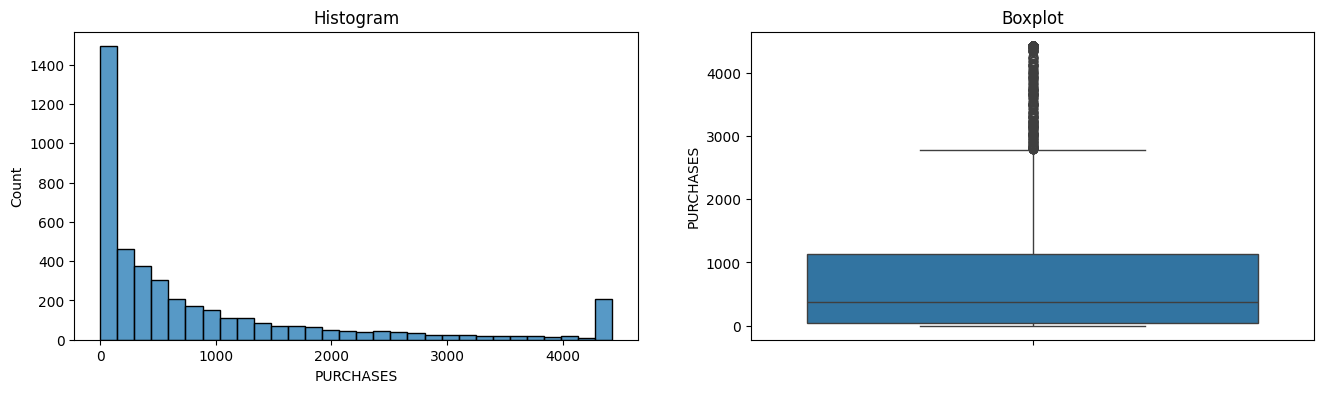

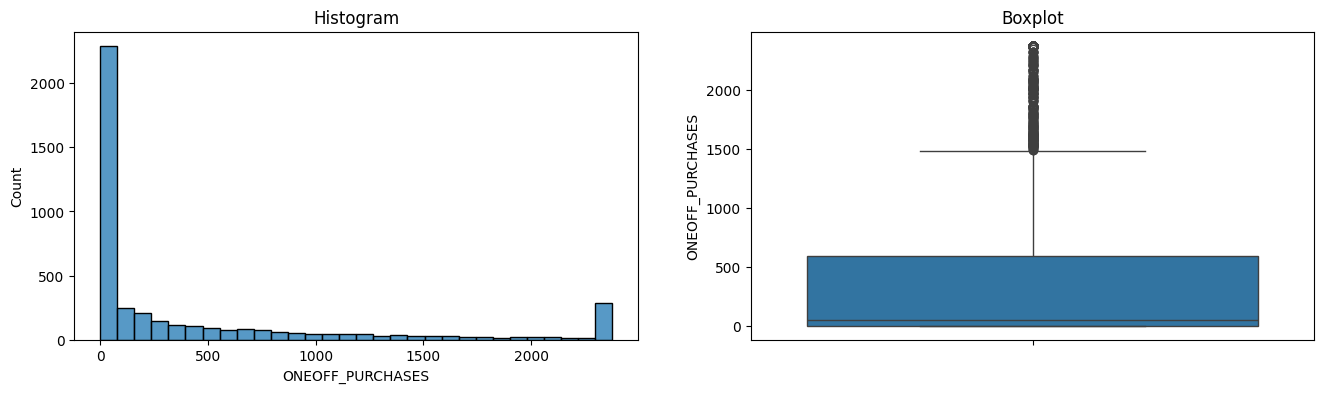

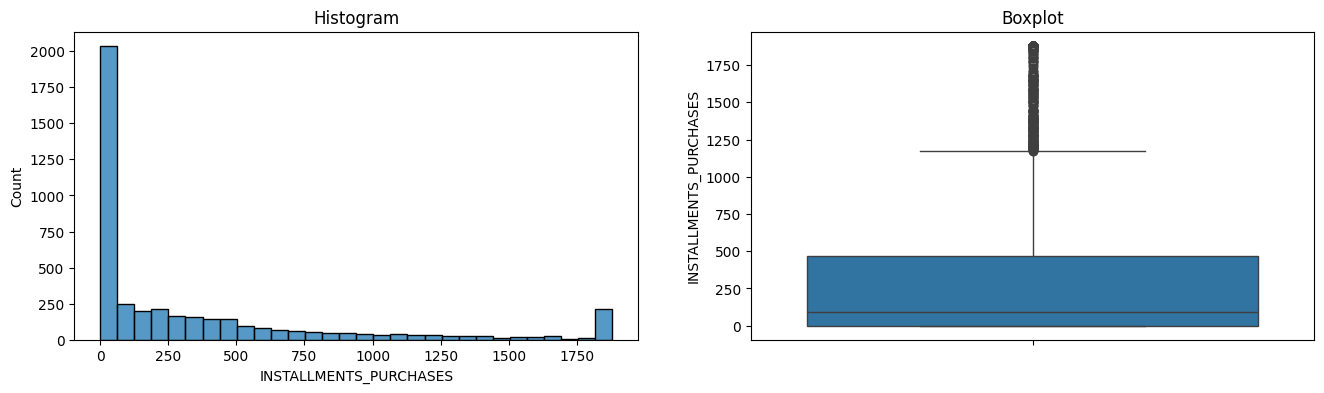

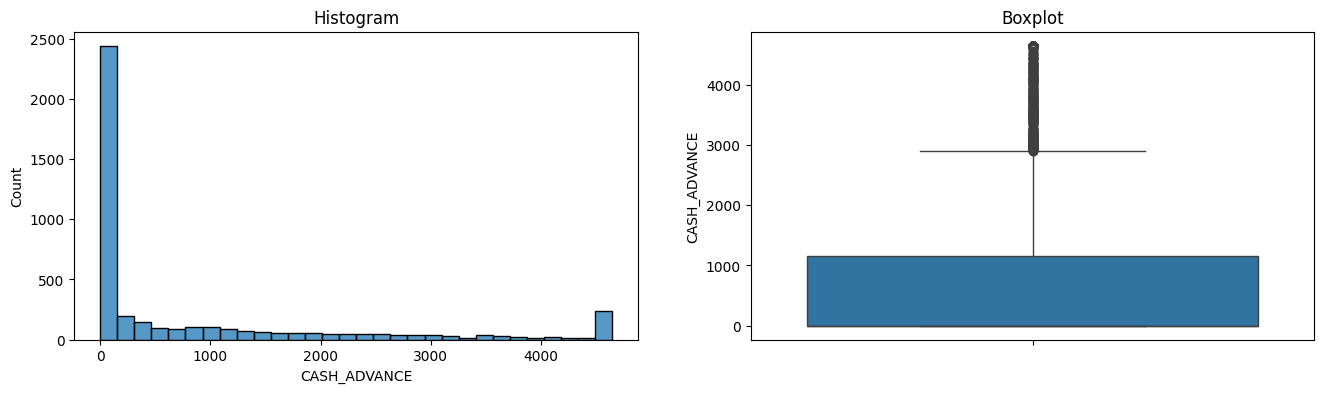

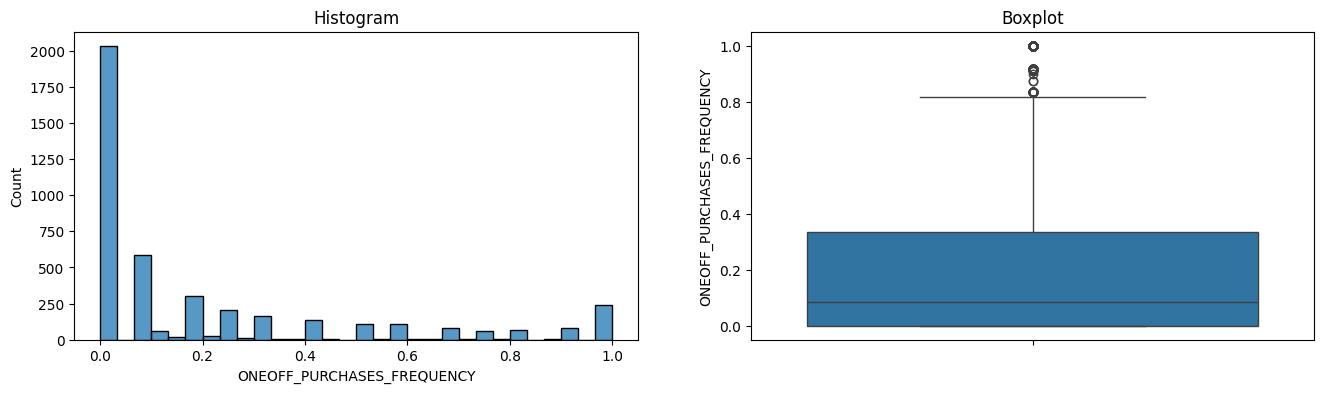

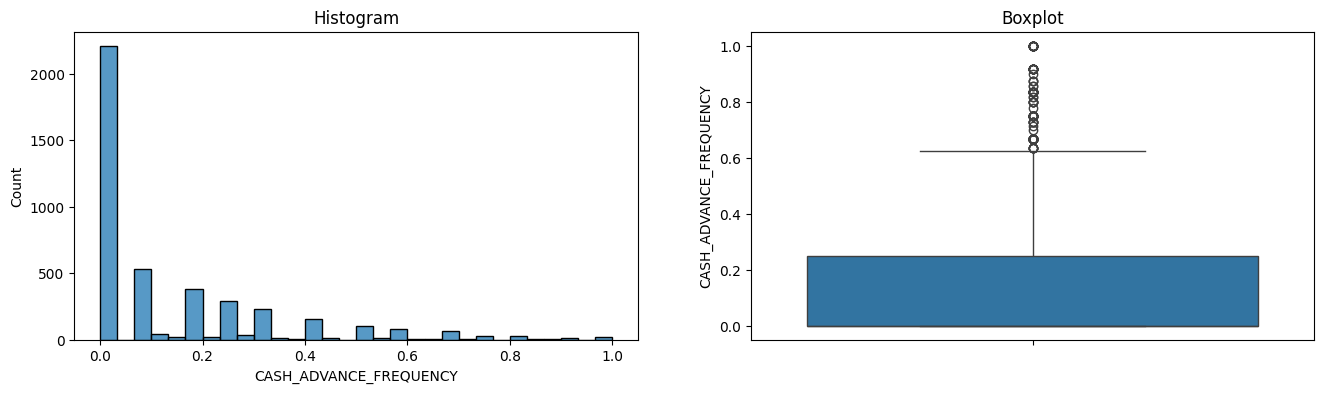

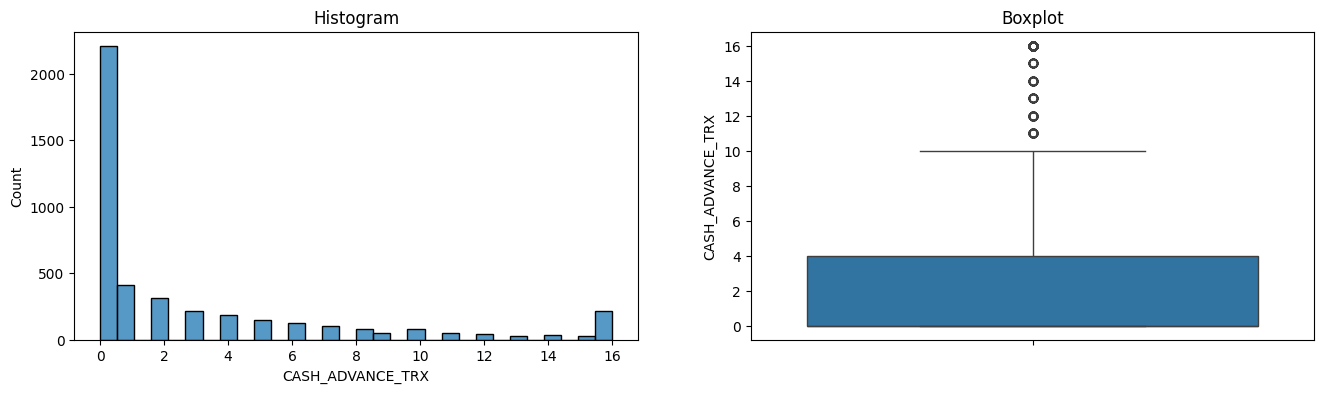

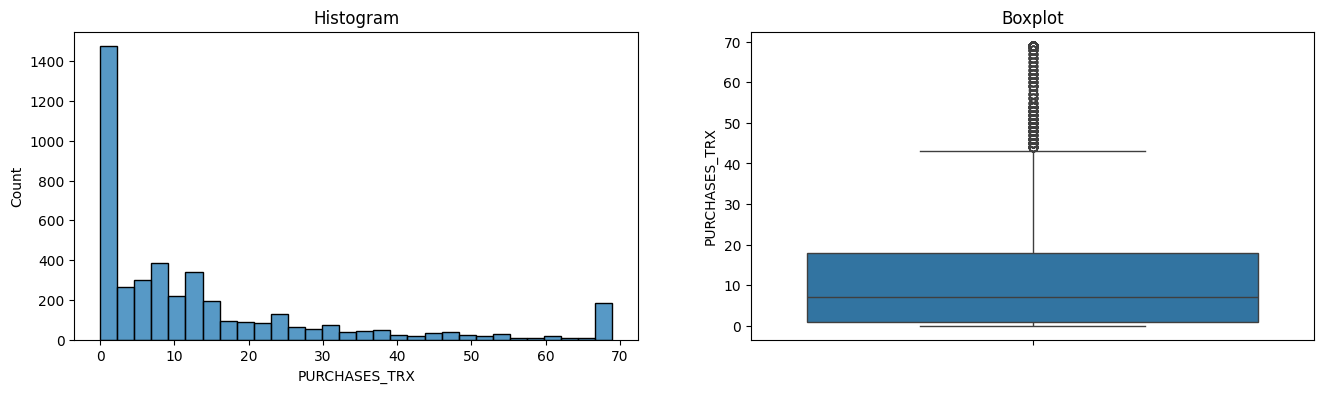

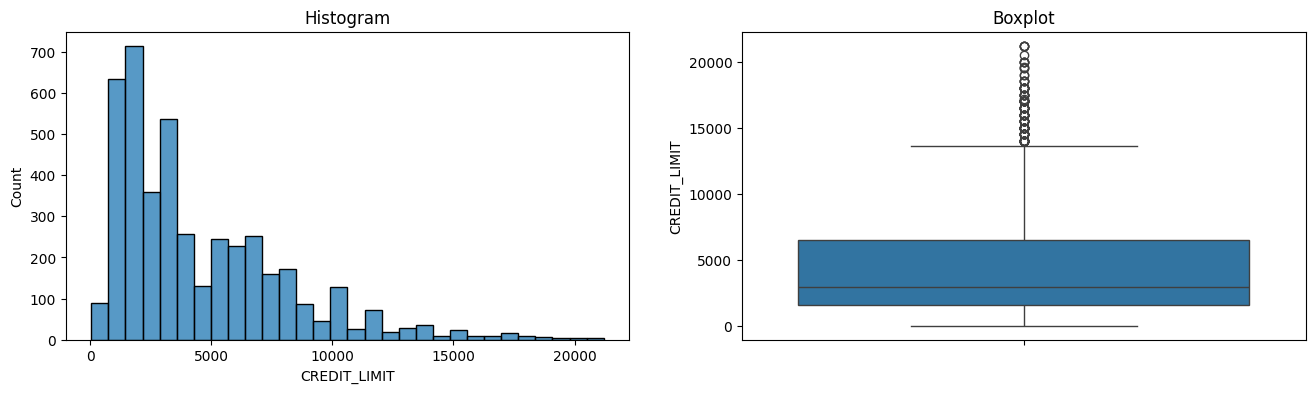

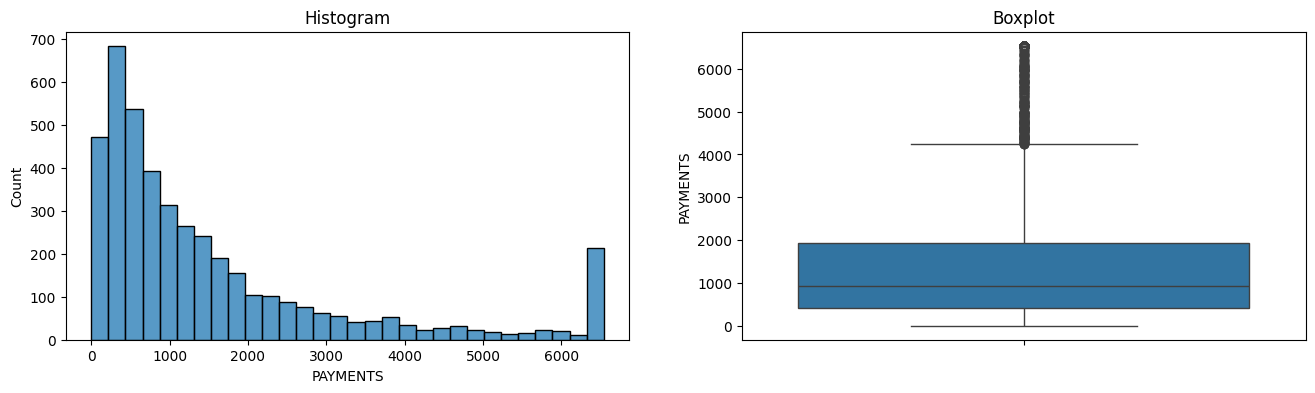

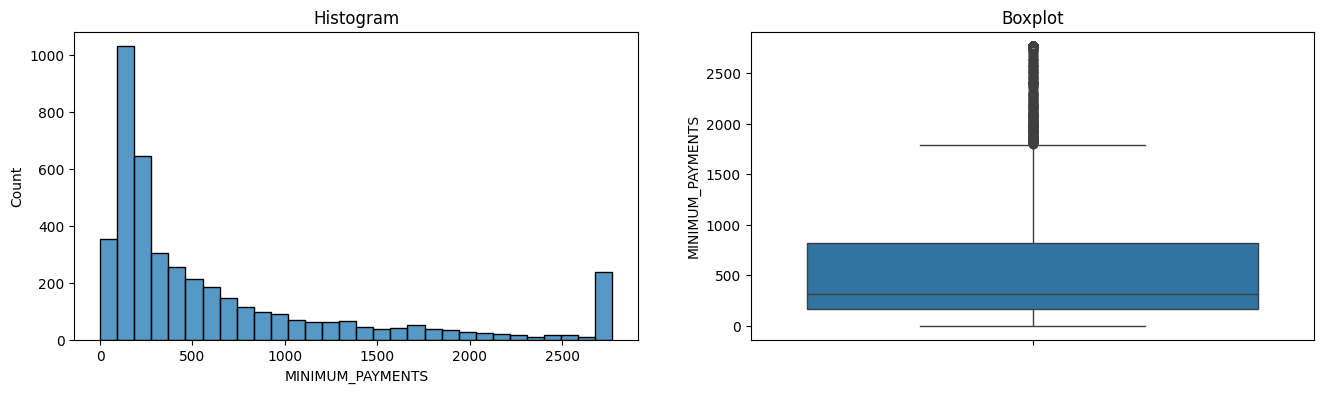

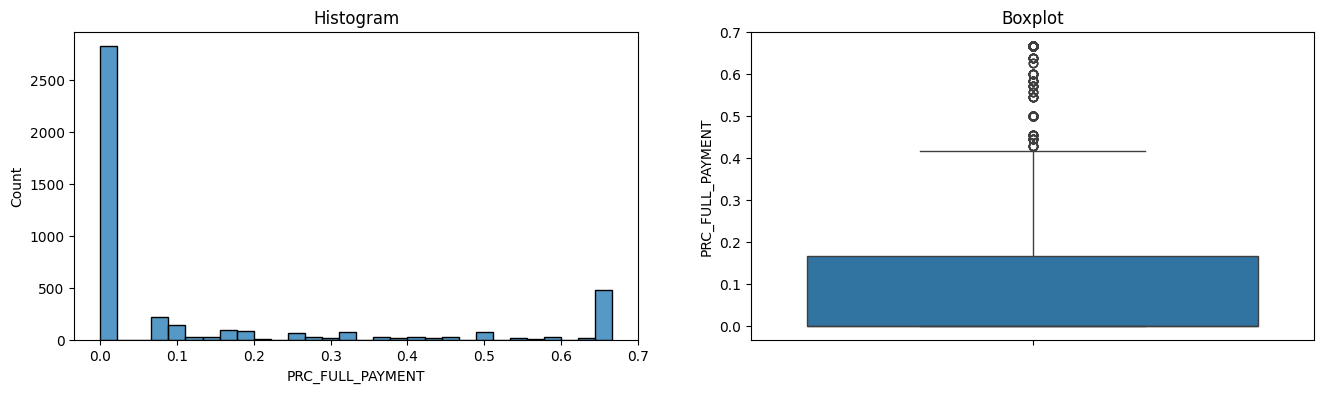

In [34]:
# Menampilkan visualisasi distribusi skew dengan boxplot after handling outlier
diagnostic_plots(df_capped_s, 'BALANCE')
diagnostic_plots(df_capped_s, 'BALANCE_FREQUENCY')
diagnostic_plots(df_capped_s, 'PURCHASES')
diagnostic_plots(df_capped_s, 'ONEOFF_PURCHASES')
diagnostic_plots(df_capped_s, 'INSTALLMENTS_PURCHASES')
diagnostic_plots(df_capped_s, 'CASH_ADVANCE')
diagnostic_plots(df_capped_s, 'ONEOFF_PURCHASES_FREQUENCY')
diagnostic_plots(df_capped_s, 'CASH_ADVANCE_FREQUENCY')
diagnostic_plots(df_capped_s, 'CASH_ADVANCE_TRX')
diagnostic_plots(df_capped_s, 'PURCHASES_TRX')
diagnostic_plots(df_capped_s, 'CREDIT_LIMIT')
diagnostic_plots(df_capped_s, 'PAYMENTS')
diagnostic_plots(df_capped_s, 'MINIMUM_PAYMENTS')
diagnostic_plots(df_capped_s, 'PRC_FULL_PAYMENT')

**Statement**: Dapat dilihat pada beberapa kolom yang distribusi skew before capping terdapat oulier yang ekstrem sehingga dilakukan handling outlier dengan capping, hasilnya rata-rata dan deviasi standar mungkin menjadi lebih stabil dan visualisasi after capping pada boxplot mengurangi nilai outlier-outlier yang ekstrem

## 6.4 - Feature Scaling

### 6.4.1 - Scaling Skew

In [35]:
# Scaling skew di scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_capped_s)

MinMaxScaler()

In [36]:
df_capped_s_scaler = scaler.transform(df_capped_s)
df_capped_s_scaler

array([[0.09530654, 0.65624966, 0.03554315, ..., 0.95197325, 0.        ,
        0.33333333],
       [0.03326662, 0.        , 0.2596863 , ..., 0.03081498, 0.        ,
        0.33333333],
       [0.05540279, 1.        , 0.1354885 , ..., 0.04972656, 0.        ,
        0.33333333],
       ...,
       [0.1663313 , 1.        , 0.        , ..., 0.11286105, 0.        ,
        0.83333333],
       [0.13333367, 1.        , 0.        , ..., 0.09996251, 0.        ,
        0.83333333],
       [0.4335108 , 1.        , 0.04629191, ..., 0.29506334, 0.        ,
        0.83333333]])

### 6.4.2 Scaling Normal

In [37]:
# Scaling Normal di scaling menggunakan StandardScaler

scaler_n = StandardScaler()
scaler_n.fit(df_capped_n)

StandardScaler()

In [38]:
df_capped_n_scaler = scaler_n.transform(df_capped_n)
df_capped_n_scaler

array([[-0.92146472, -0.92428962],
       [-0.92146472, -0.92428962],
       [-0.92146472, -0.92428962],
       ...,
       [-1.23166   , -0.92428962],
       [-1.23166   , -0.92428962],
       [-1.00606366, -0.92428962]])

## 6.5 - Merge (concat) data

In [39]:
# Menggabungkan scaling skew dan scaling normal

df_final = np.concatenate([df_capped_s_scaler,df_capped_n_scaler],axis=1)
df_final[0]

array([ 0.09530654,  0.65624966,  0.03554315,  0.06621541,  0.        ,
        0.        ,  0.125     ,  0.        ,  0.        ,  0.08695652,
        0.05437352,  0.22850422,  0.95197325,  0.        ,  0.33333333,
       -0.92146472, -0.92428962])

## 6.6 - PCA

In [40]:
# Train with PCA

pca = PCA()
pca.fit(df_final)

PCA()

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

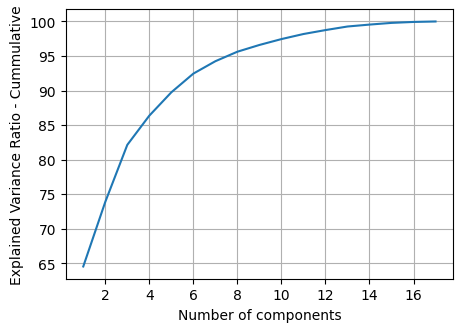

In [41]:
# Plot the Cummulative of Explained Variance Ratio

plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

Text(0, 0.5, 'Eigenvalues')

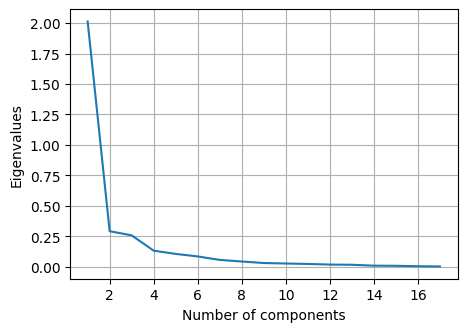

In [42]:
# Plot the Eigenvalues

plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [43]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

8

**Statement**: Mempertahankan fitur menjadi 8 fitur 

In [44]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(df_final)

df_final_pca = pca.transform(df_final)

**Statement:** PCA(n_components=0.95) supaya bisa mengurangi fiturnya dan mempertahankan data 95%

### 6.6.1 Elbow Method

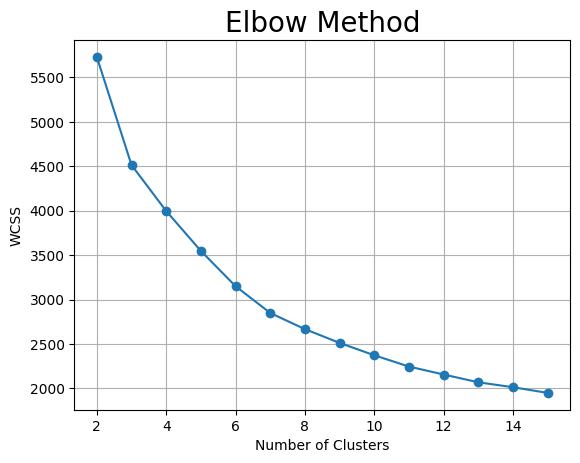

In [45]:
# Find the optimal number of clusters using Elbow Method

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_final_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Statement**: Berdasarkan plot di atas, elbow point atau titik sikunya berada pada Number of cluster nilai 3, artinya dari Elbow Method menunjukkan cluster yg paling bagus adalah 3  cluster.

### 6.6.2 Silhoutte Plot & Silhoutte Score

In [46]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.471475594237235
For n_clusters = 3 The average silhouette_score is : 0.3578960106387001
For n_clusters = 4 The average silhouette_score is : 0.3261713647587277
For n_clusters = 5 The average silhouette_score is : 0.32136141766050363
For n_clusters = 6 The average silhouette_score is : 0.26943282613244934
For n_clusters = 7 The average silhouette_score is : 0.28519594211433325
For n_clusters = 8 The average silhouette_score is : 0.28933324679624434
For n_clusters = 9 The average silhouette_score is : 0.28123458206386537
For n_clusters = 10 The average silhouette_score is : 0.2653477213862948
For n_clusters = 11 The average silhouette_score is : 0.27322273945906744
For n_clusters = 12 The average silhouette_score is : 0.27257069458056293
For n_clusters = 13 The average silhouette_score is : 0.27394525361879696
For n_clusters = 14 The average silhouette_score is : 0.26756429887394184


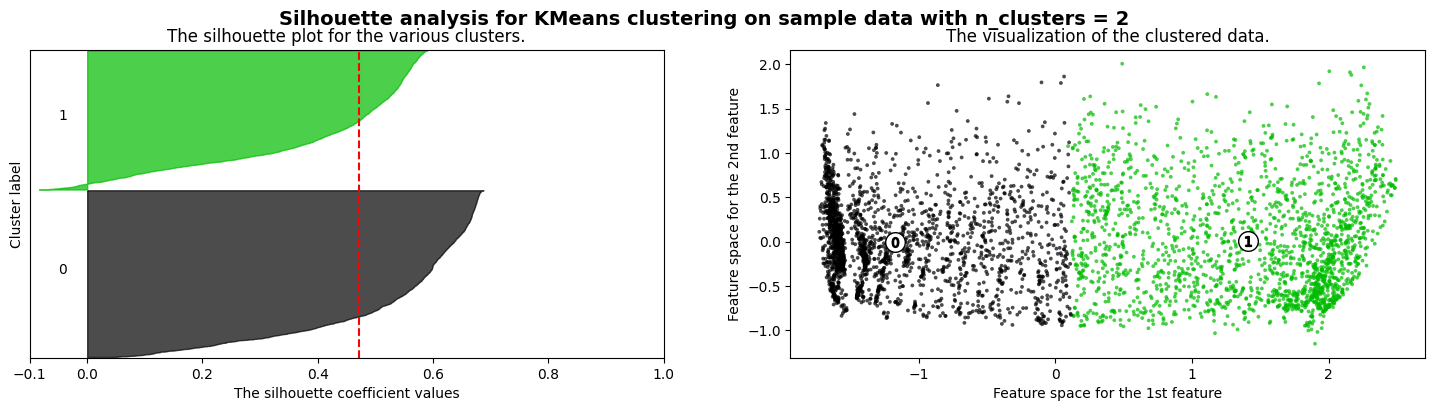

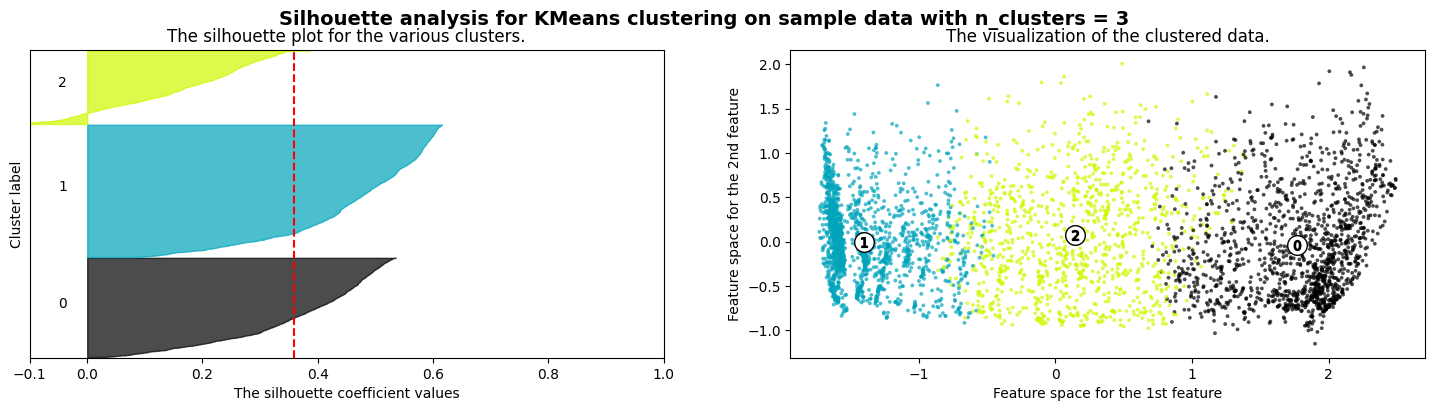

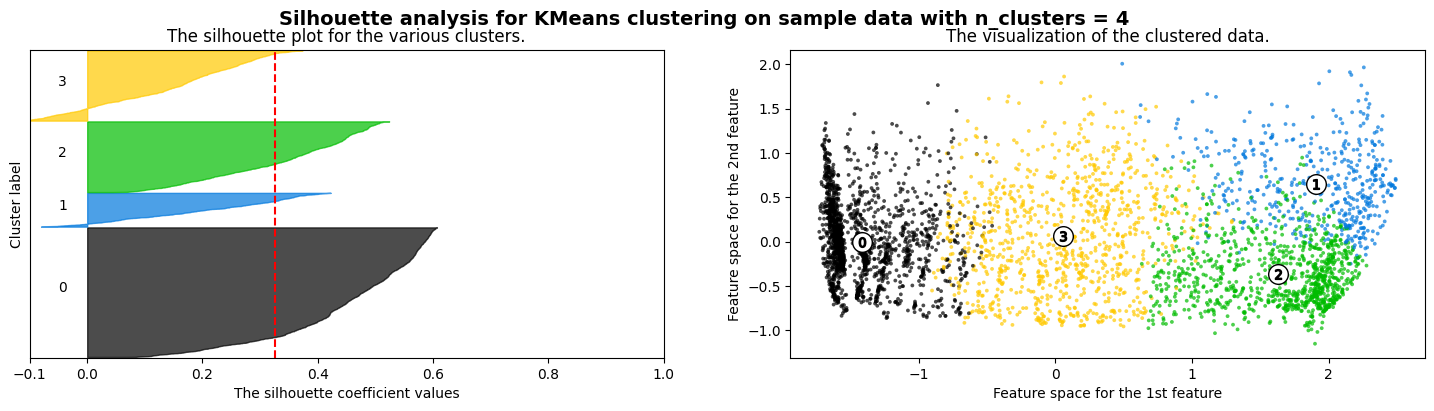

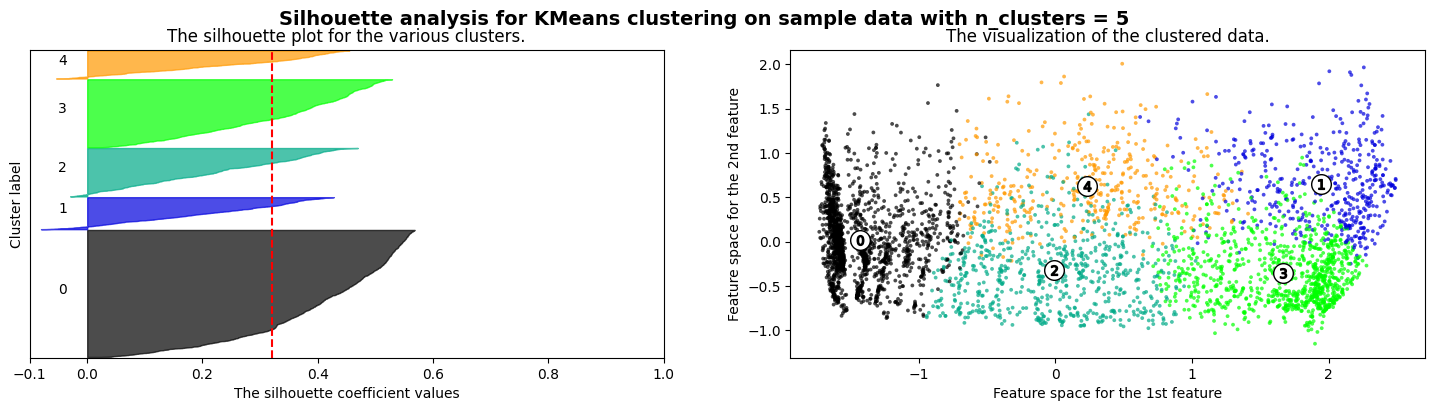

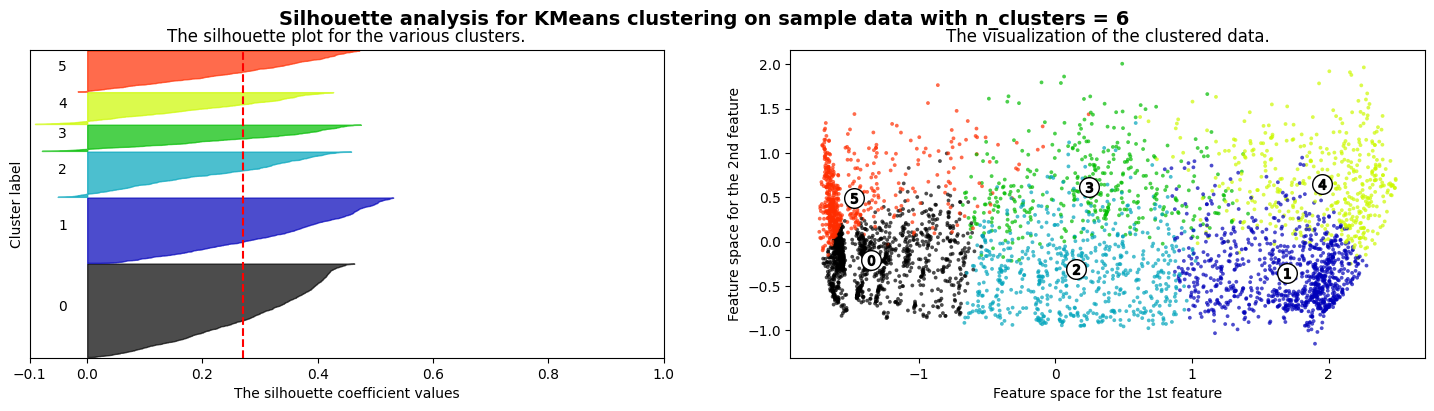

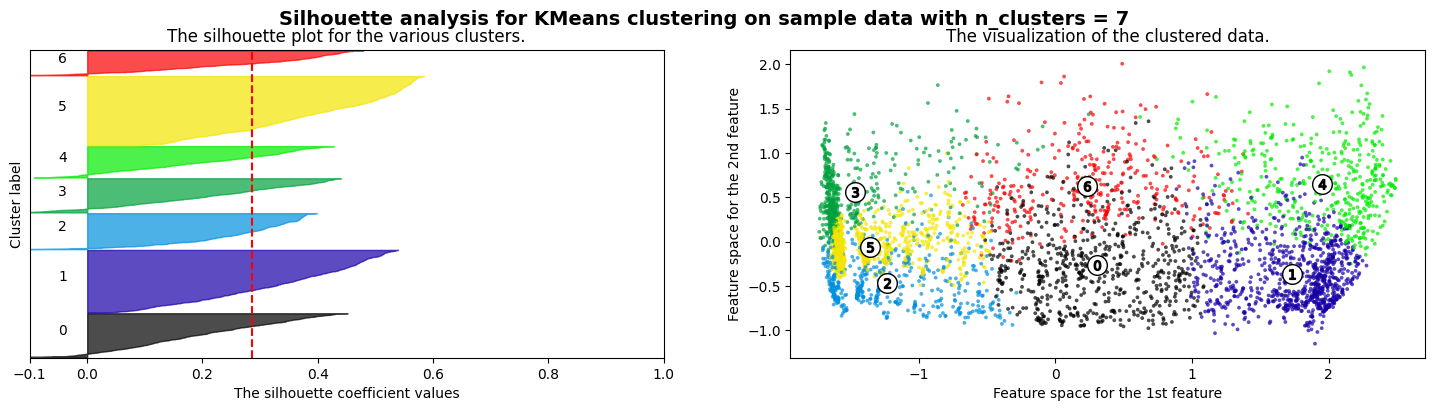

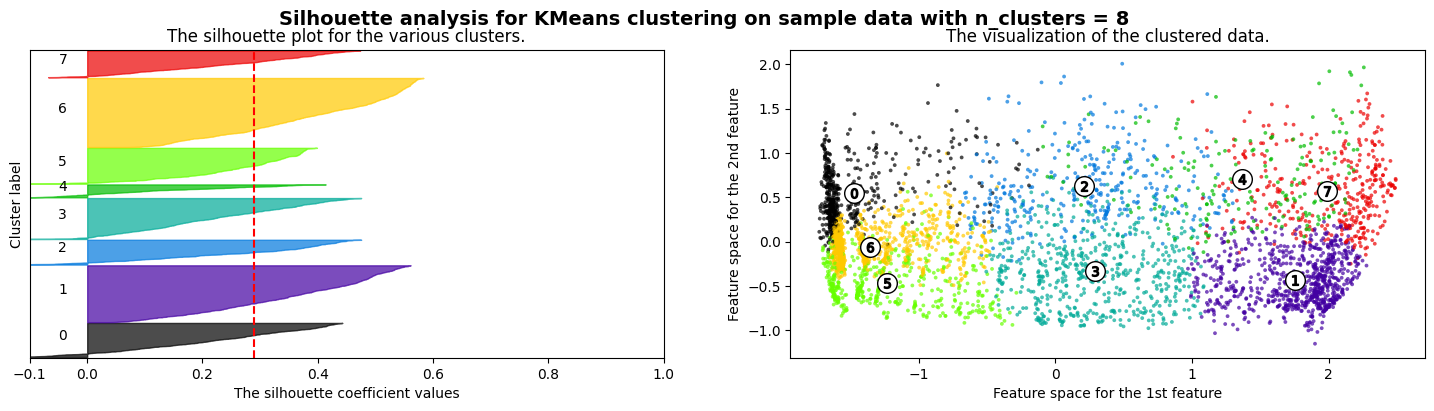

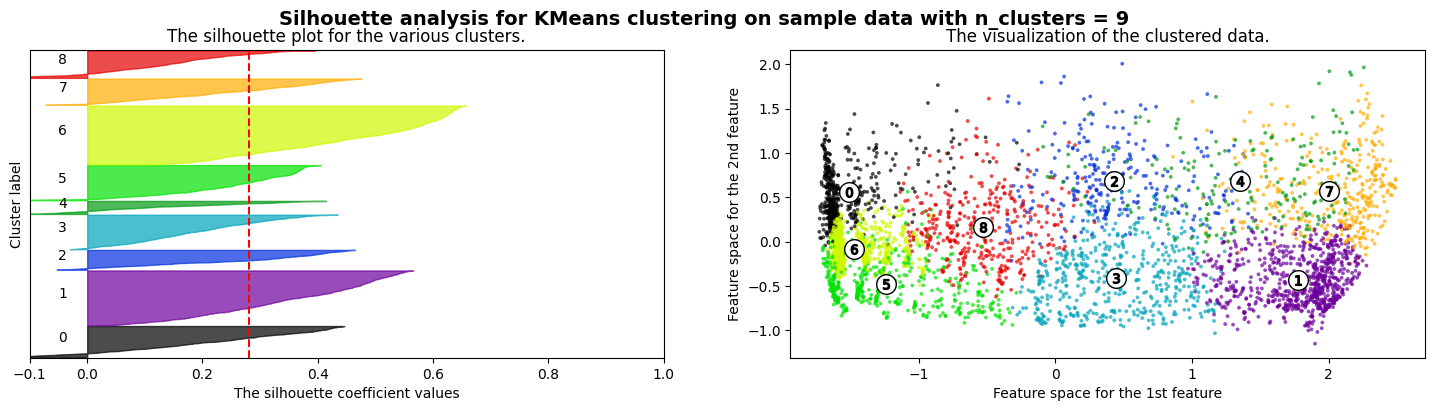

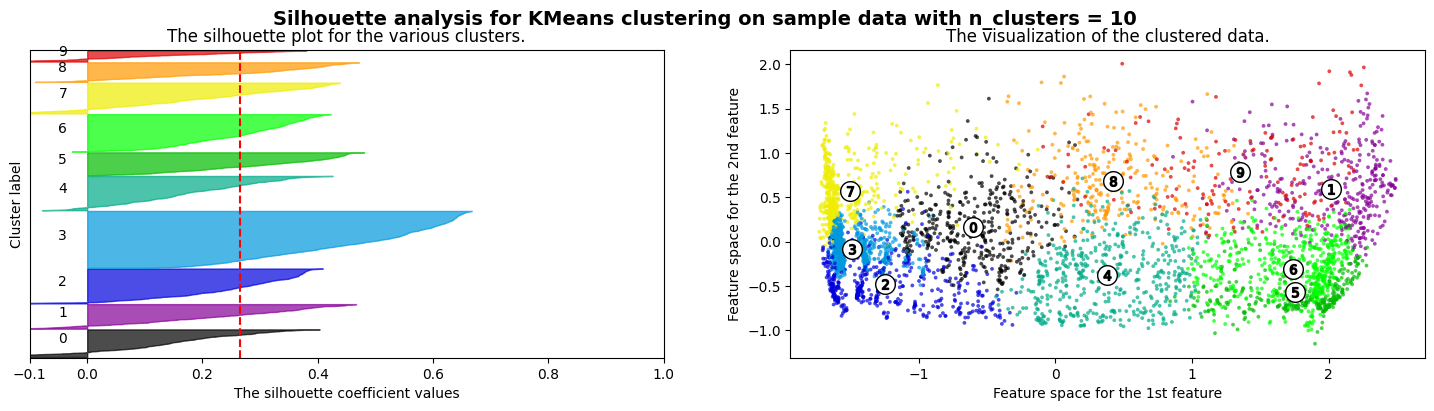

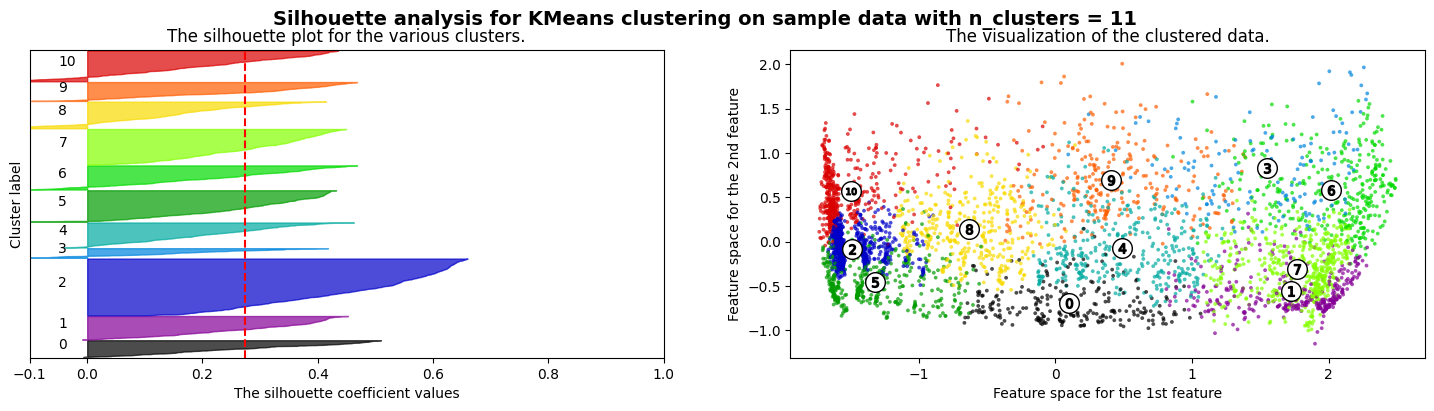

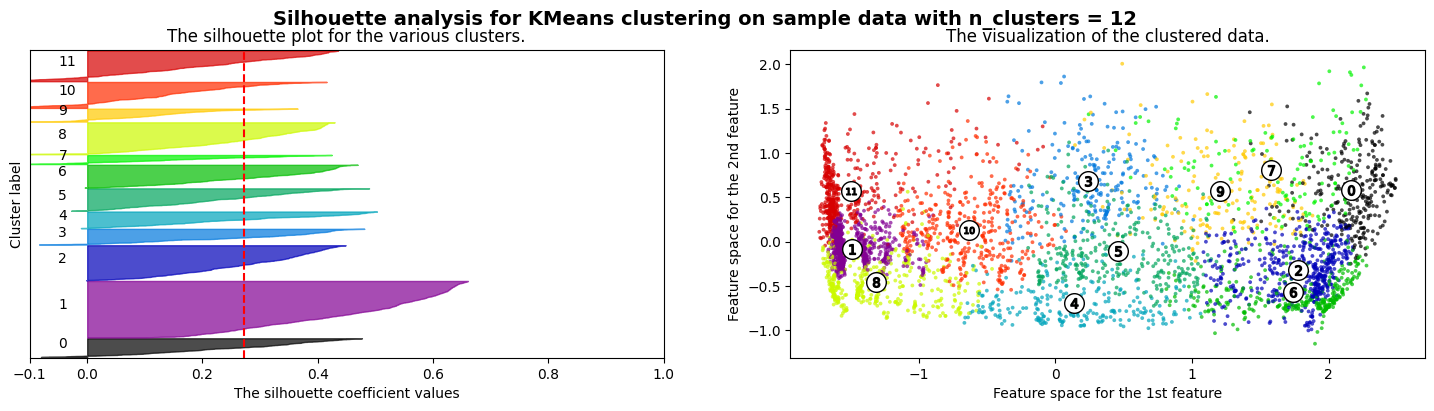

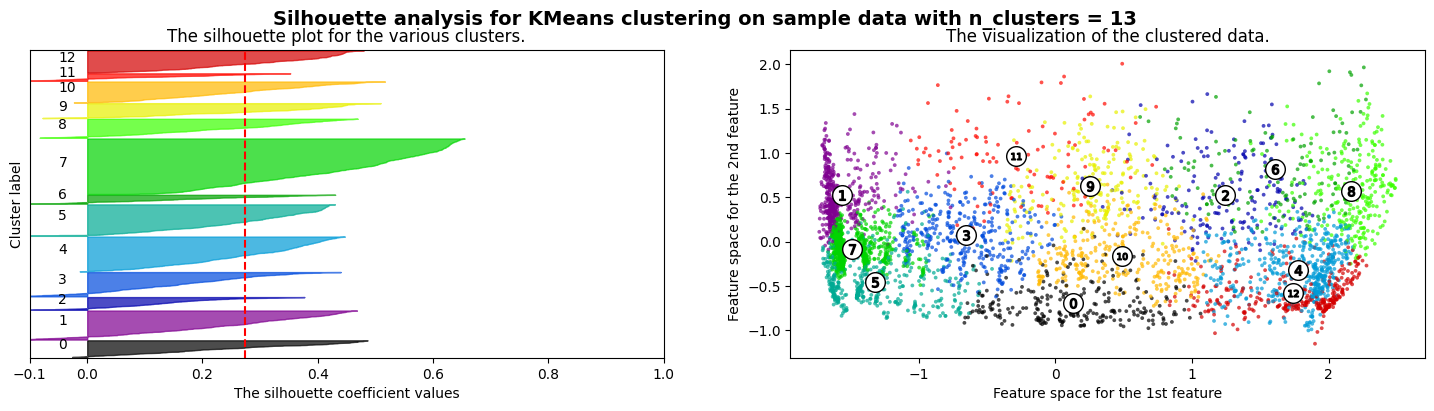

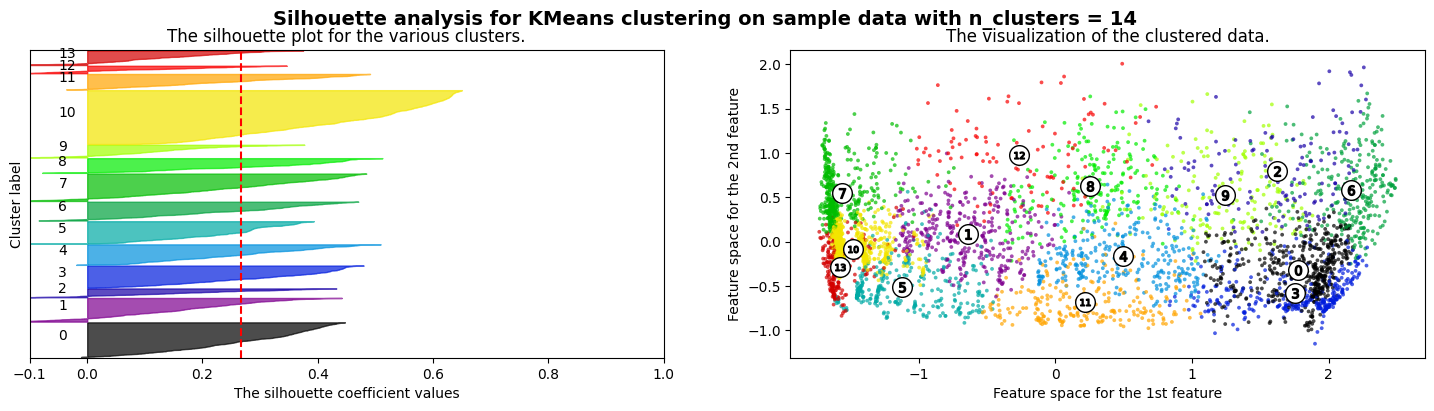

In [47]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_final_pca, random_state)

**Statement**: walapun silhouette_score paling tinggi yg mendekati nilai 1 adlah cluster 2 namun menurut saya cluster tersebut kurang membagi data dg baik, terlalu meluas persebaran data dari visualisasisilhouette plot. Walaupun nilai silhouette_score cluster 4 lebih kecil, berdasarkan visualisasi distribusi cluster terlihat bahwa `n_cluster=4` memberikan visualisasi yang baik yang semua data sudah seusai dengan clusternya tidak ada yang mengambil cluster satu sama lain. Oleh karena itu, dapat disimpulkan bahwa berdasarkan Silhouette Plot, jumlah cluster yang optimal adalah `n_clusters=4`.

# 7. Model Definition

## 7.1 Model Elbow Method

In [48]:
# Train with optimal number of clusters

km_el = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
km_el


KMeans(n_clusters=3, n_init=10, random_state=10)

## 7.2 Model Silhoutte Method

In [49]:
# Train with optimal number of clusters

km_sil = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
km_sil


KMeans(n_clusters=4, n_init=10, random_state=10)

# 8. Model Training

## 8.1 Model Elbow Method

In [50]:
# Train with optimal number of clusters

pred_el = km_el.fit_predict(df_final_pca)
pred_el

array([1, 1, 1, ..., 1, 1, 1])

## 8.2 Model Silhoutte Method

In [51]:
# Train with optimal number of clusters

pred_sil = km_sil.fit_predict(df_final_pca)
pred_sil

array([0, 0, 0, ..., 0, 0, 0])

# 9. Model Evaluation

## 9.1 Model Elbow Method

In [52]:
# Insert clustering result into original dataset

df['cluster_elbow'] = pred_el
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2      757.964752              0.875      157.4             157.4   
3      264.566591              0.375     1150.0            1150.0   
4      440.613643              1.000      600.0             600.0   
5      611.561026              1.000      765.0             765.0   
7      105.333584              0.375      306.0             306.0   
...           ...                ...        ...               ...   
4470  9629.808851              1.000        0.0               0.0   
4471  1040.030221              1.000        0.0               0.0   
4472  1322.818587              1.000        0.0               0.0   
4473  1060.391273              1.000        0.0               0.0   
4474  3447.674222              1.000      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
5                       0.125000                               0.0   
7                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_elbow  
2     1494.480376       2638.598410               0.0       8              1  
3     3029.380326         85.428885               0.0       8              1  
4      215.316424        137.846006               0.0       8              1  
5      204.464151        146.352314               0.0       8              1  
7      101.986927        118.324082               0.0       8              1  
...           ...               ...               ...     ...            ...  
4470  2468.988022       2134.2957

**Statement**: Dari dataframe diatas ditambahkan kolom cluster_elbow untuk menunjukkan data mana saja yang termasuk cluster 0, cluster 1 dan cluster 2.

In [53]:
display(
    df.groupby('cluster_elbow').mean().T, # rata-rata nilai fitur setiap cluster
    df['cluster_elbow'].value_counts().to_frame().sort_index() # jumlah orang pada setiap cluster
)

cluster_elbow                               0            1            2
BALANCE                           1530.800093  1859.789597  1235.412209
BALANCE_FREQUENCY                    0.961429     0.852877     0.880486
PURCHASES                         2003.226142   198.981905  1194.177992
ONEOFF_PURCHASES                   953.446427   177.011361   921.894419
INSTALLMENTS_PURCHASES            1050.228114    22.011483   272.588088
CASH_ADVANCE                       650.672464  1522.016487   537.404025
PURCHASES_FREQUENCY                  0.948159     0.082677     0.631144
ONEOFF_PURCHASES_FREQUENCY           0.274426     0.061532     0.375252
PURCHASES_INSTALLMENTS_FREQUENCY     0.885239     0.020327     0.295099
CASH_ADVANCE_FREQUENCY               0.085208     0.212366     0.079410
CASH_ADVANCE_TRX                     2.145907     5.029349     2.056676
PURCHASES_TRX                       33.869039     1.525614    14.886647
CREDIT_LIMIT                      4872.672634  4169.196662  4674.497860
PAYMENTS                          2263.827626  1556.570706  1542.307195
MINIMUM_PAYMENTS                  1063.222530   885.288927   598.194511
PRC_FULL_PAYMENT                     0.249303     0.051912     0.215848
TENURE                              11.560854    11.462647    11.639769

count
cluster_elbow       
0               1405
1               1874
2               1041

<Axes: >

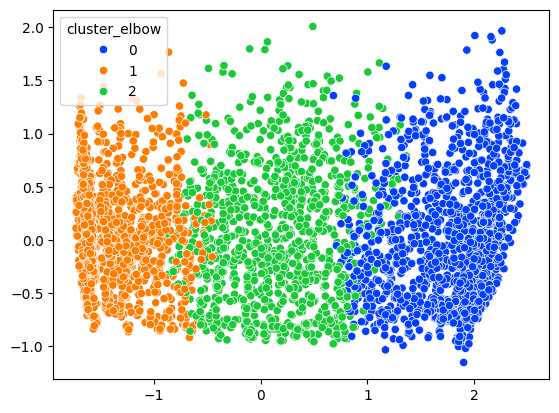

In [54]:
# Cluster visualization in 2D pada kolom cluster_elbow

pca_2d = PCA(n_components=5)
pca_2d.fit(df_final_pca)

df_final_pca_2d = pca_2d.fit_transform(df_final_pca)

sns.scatterplot(x=df_final_pca_2d[:,0], y=df_final_pca_2d[:,1], hue=df['cluster_elbow'], palette='bright')

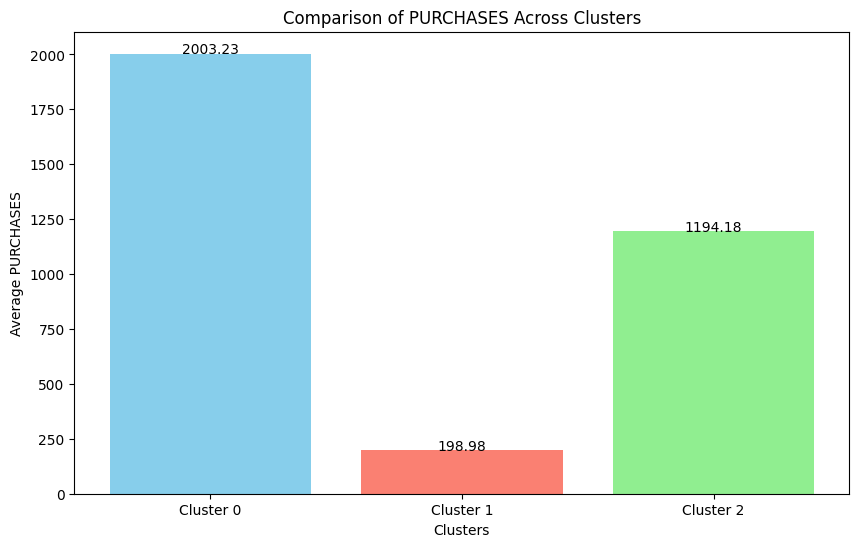

In [65]:
# Data PURCHASES untuk setiap cluster
clusters_el = ['Cluster 0', 'Cluster 1', 'Cluster 2']
purchases = [2003.226142, 198.981905, 1194.177992]

plt.figure(figsize=(10, 6))
plt.bar(clusters_el, purchases, color=['skyblue', 'salmon', 'lightgreen'])
# Menambahkan nilai di atas setiap bar
for i, value in enumerate(purchases):
    plt.text(i, value + 0.1, str(round(value, 2)), ha='center')
plt.xlabel('Clusters')
plt.ylabel('Average PURCHASES')
plt.title('Comparison of PURCHASES Across Clusters')
plt.show()

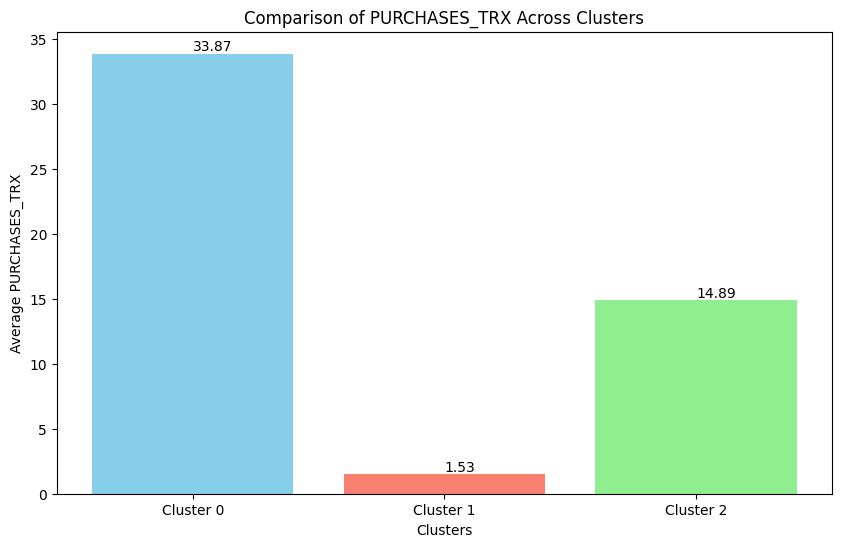

In [66]:
# Data
clusters_el = ['Cluster 0', 'Cluster 1', 'Cluster 2']
purchases_trx_data = [33.869039, 1.525614, 14.886647]

plt.figure(figsize=(10, 6))
bars = plt.bar(clusters_el, purchases_trx_data, color=['skyblue', 'salmon', 'lightgreen'])
# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.title('Comparison of PURCHASES_TRX Across Clusters')
plt.xlabel('Clusters')
plt.ylabel('Average PURCHASES_TRX')
plt.show()


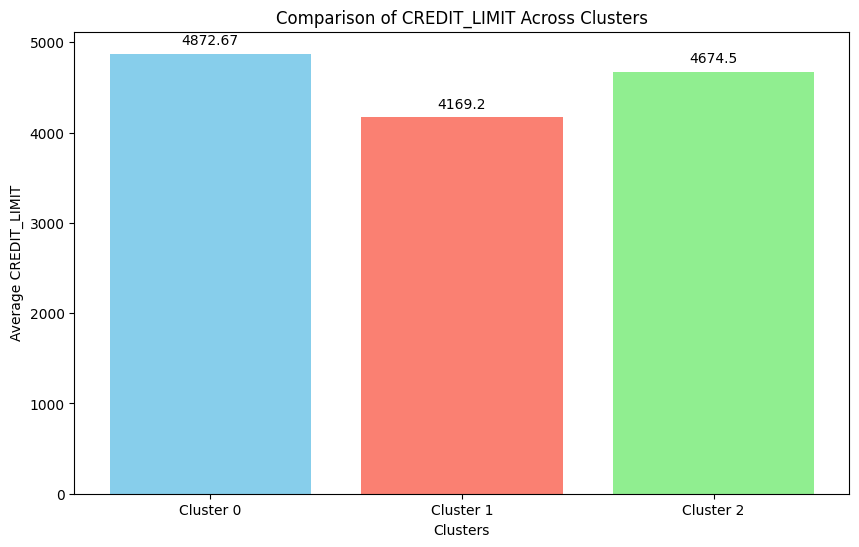

In [67]:

# Data CREDIT_LIMIT untuk setiap cluster
clusters_el = ['Cluster 0', 'Cluster 1', 'Cluster 2']
credit_limits = [4872.672634, 4169.196662, 4674.497860]

plt.figure(figsize=(10, 6))
plt.bar(clusters_el, credit_limits, color=['skyblue', 'salmon', 'lightgreen'])
# Menambahkan nilai di atas setiap bar
for i, value in enumerate(credit_limits):
    plt.text(i, value + 100, str(round(value, 2)), ha='center')
plt.xlabel('Clusters')
plt.ylabel('Average CREDIT_LIMIT')
plt.title('Comparison of CREDIT_LIMIT Across Clusters')
plt.show()

**_Statement_**:

Berdasarkan dataframe & visualisasi di atas diperoleh 3 cluster hasil dari model KMeans, dengan ciri-ciri setiap cluster sebagai berikut:

- Cluster 0 merupakan cluster dengan total jumlah nasabah kelompok menengah dibandingkan dengan cluster 1 dan cluster 2 yaitu sebanyak 1405 nasabah. 

(2) Nasabah pada cluster ini lebih konsumtif dalam menggunakan kartu kredit mereka. Hal ini ditunjukkan dari jumlah pembelian (purchases) mereka yang paling besar, yaitu $2003 dengan (purchases_trx) rata-rata jumlah transaksi pembelian sebanyak 34 kali transaksi. Frekuensi pembelian (Purchases_Frequency) yang paling besar yaitu 95%. Mereka juga lebih banyak melakukan pembelian dengan sistem cicilan (installments) dibandingkan dengan sistem langsung lunas (oneoff). Mereka juga memiliki credit limit yang paling besar yaitu $4872. Sehingga dapat dikatakn kelompok ini adalah kelompok orang-orang kaya.


- Cluster 1 merupakan cluster dengan jumlah nasabah terbanyak dibanding dengan cluster lainnya yaitu sebanyak 1874 nasabah. 

(0) Nasabah pada cluster ini melakukan jumlah pembelian (purchases) paling sedikit dengan rata-rata pembelian sebesar $1999 dan rata-rata jumlah transaksi hanya 1-2 kali. Frekuensi pembelian (Purchases_Frequency) yang paling kecil yaitu 8%. Namun, mereka lebih banyak menggunakan kartu kredit mereka untuk melakukan penarikan uang tunai (Cash_Advance) dengan rata-rata penarikan uang sebesar $1522 dan(Cash_Advance_Trx) rata-rata sebanyak 5 kali transaksi. Kemudian, presentase pembayaran penuh (prc_full_payments) mereka juga yang paling kecil, yaitu hanya sekitar 5%. Cluster ini juga memiliki credit limit yang paling sedikit yaitu $4169. Kelompok ini mungkin terdiri dari pengguna kartu kredit yang jarang menggunakan kartu dan memiliki saldo yang rendah.

- Cluster 2 merupakan cluster dengan jumlah nasabah paling sedikit dibanding dengan cluster lainnya yaitu sebanyak 1041 nasabah. 

(1) Merupakan cluster dengan jumlah pembelian (purchases) kelompok menengah apabila dibandingkan dengan cluster 0 dan cluster 1. dengan rata-rata pembelian sebesar $1194 dan rata-rata jumlah transaksi hanya 14-15 kali. Mereka juga lebih banyak melakukan pembelian dengan sistem lunas (oneoff) dibandingkan dengan cicilan (installments). Kelompok ini mungkin merupakan kelompok pengguna kartu kredit dengan perilaku transaksi yang berada di tengah-tengah. Cluster ini juga memiliki credit limit yang nilainya tengah-tengah yaitu $4674

-  Mayoritas nasabah pada semua cluster lebih memilih tenure 12 bulan. Tenure yang lama juga memudahkan para nasabah dalam mengatur keuangan mereka, sehingga tidak terlalu membebani keuangan mereka.

## 9.2 Model Silhoutte Method

In [55]:
# Insert clustering result into original dataset

df['cluster_silhoutte'] = pred_sil
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2      757.964752              0.875      157.4             157.4   
3      264.566591              0.375     1150.0            1150.0   
4      440.613643              1.000      600.0             600.0   
5      611.561026              1.000      765.0             765.0   
7      105.333584              0.375      306.0             306.0   
...           ...                ...        ...               ...   
4470  9629.808851              1.000        0.0               0.0   
4471  1040.030221              1.000        0.0               0.0   
4472  1322.818587              1.000        0.0               0.0   
4473  1060.391273              1.000        0.0               0.0   
4474  3447.674222              1.000      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
5                       0.125000                               0.0   
7                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_elbow  \
2     1494.480376       2638.598410               0.0       8              1   
3     3029.380326         85.428885               0.0       8              1   
4      215.316424        137.846006               0.0       8              1   
5      204.464151        146.352314               0.0       8              1   
7      101.986927        118.324082               0.0       8              1   
...           ...               ...               ...     ...            ...   
4470  2468.988022       21

**Statement**: Dari dataframe diatas ditambahkan kolom cluster_elbow untuk menunjukkan data mana saja yang termasuk cluster 0, cluster 1, cluster 2 & cluster 3

In [57]:
display(
    df.groupby('cluster_silhoutte').mean().T, # rata-rata nilai fitur setiap cluster
    df['cluster_silhoutte'].value_counts().to_frame().sort_index() # jumlah orang pada setiap cluster
)

cluster_silhoutte                           0            1            2  \
BALANCE                           1864.547292  2794.709920   913.940385   
BALANCE_FREQUENCY                    0.854454     0.983429     0.944982   
PURCHASES                          192.375712  4568.206583   807.219313   
ONEOFF_PURCHASES                   171.369837  2780.717458   150.154841   
INSTALLMENTS_PURCHASES              21.047571  1788.739125   657.094353   
CASH_ADVANCE                      1539.304500  1149.242497   404.746056   
PURCHASES_FREQUENCY                  0.077633     0.967138     0.925538   
ONEOFF_PURCHASES_FREQUENCY           0.057754     0.652519     0.100756   
PURCHASES_INSTALLMENTS_FREQUENCY     0.018807     0.847882     0.877023   
CASH_ADVANCE_FREQUENCY               0.214488     0.125291     0.064819   
CASH_ADVANCE_TRX                     5.076630     3.689583     1.375498   
PURCHASES_TRX                        1.428261    63.885417    18.960159   
CREDIT_LIMIT                      4167.377470  7501.250000  3632.076744   
PAYMENTS                          1561.855437  4774.846407  1069.130464   
MINIMUM_PAYMENTS                   879.584343  1455.643802   853.876345   
PRC_FULL_PAYMENT                     0.048406     0.229969     0.262852   
TENURE                              11.457065    11.872917    11.412351   
cluster_elbow                        1.000000     0.137500     0.093625   

cluster_silhoutte                           3  
BALANCE                           1237.208853  
BALANCE_FREQUENCY                    0.876187  
PURCHASES                         1077.716315  
ONEOFF_PURCHASES                   833.517339  
INSTALLMENTS_PURCHASES             244.517249  
CASH_ADVANCE                       537.720461  
PURCHASES_FREQUENCY                  0.610251  
ONEOFF_PURCHASES_FREQUENCY           0.372370  
PURCHASES_INSTALLMENTS_FREQUENCY     0.268006  
CASH_ADVANCE_FREQUENCY               0.080805  
CASH_ADVANCE_TRX                     2.096386  
PURCHASES_TRX                       13.667671  
CREDIT_LIMIT                      4628.666940  
PAYMENTS                          1469.965705  
MINIMUM_PAYMENTS                   603.557754  
PRC_FULL_PAYMENT                     0.209735  
TENURE                              11.649598  
cluster_elbow                        1.963855

count
cluster_silhoutte       
0                   1840
1                    480
2                   1004
3                    996

<Axes: >

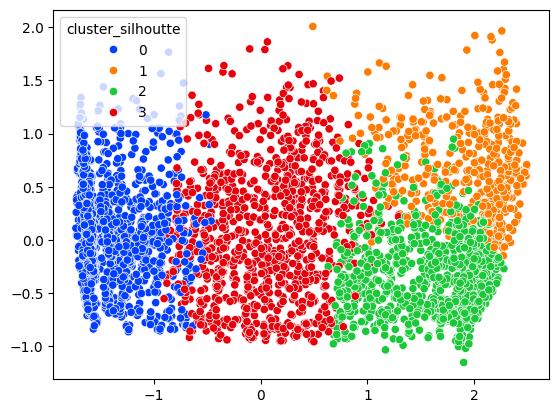

In [58]:
# Cluster visualization in 2D pada kolom cluster_silhoutte

pca_2d = PCA(n_components=5)
pca_2d.fit(df_final_pca)

df_final_pca_2d = pca_2d.fit_transform(df_final_pca)

sns.scatterplot(x=df_final_pca_2d[:,0], y=df_final_pca_2d[:,1], hue=df['cluster_silhoutte'], palette='bright')

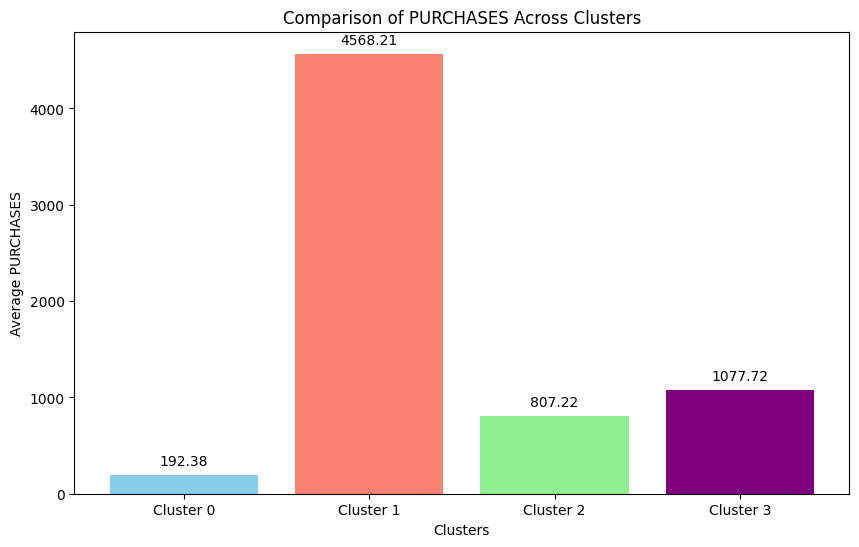

In [76]:
# Data PURCHASES untuk setiap cluster
clusters_sil = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
purchases_data = [192.375712, 4568.206583, 807.219313, 1077.716315]


plt.figure(figsize=(10, 6))
plt.bar(clusters_sil, purchases_data, color=['skyblue', 'salmon', 'lightgreen', 'purple'])
# Menambahkan nilai di atas setiap bar
for i, value in enumerate(purchases_data):
    plt.text(i, value + 100, str(round(value, 2)), ha='center')
plt.xlabel('Clusters')
plt.ylabel('Average PURCHASES')
plt.title('Comparison of PURCHASES Across Clusters')
plt.show()

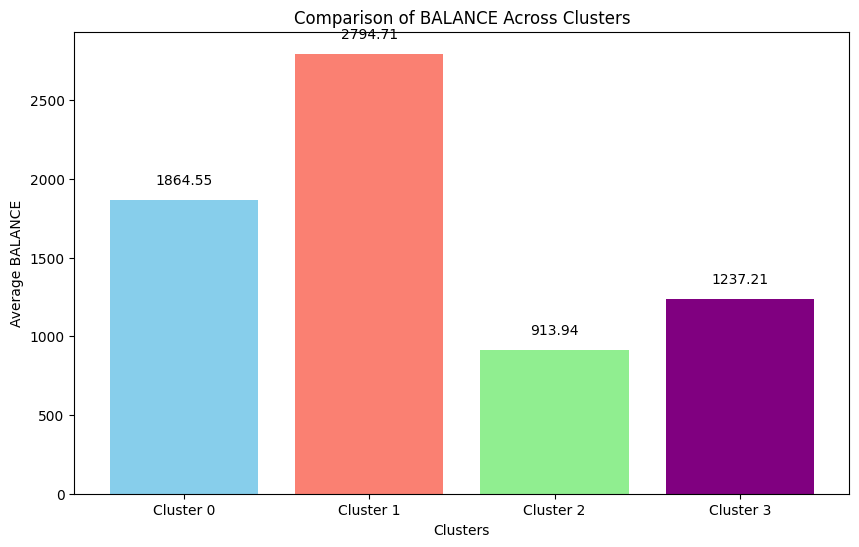

In [75]:
# Data BALANCE untuk setiap cluster
clusters_sil = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
balance_data = [1864.547292, 2794.709920, 913.940385, 1237.208853]

plt.figure(figsize=(10, 6))
plt.bar(clusters_sil, balance_data, color=['skyblue', 'salmon', 'lightgreen', 'purple'])
# Menambahkan nilai di atas setiap bar
for i, value in enumerate(balance_data):
    plt.text(i, value + 100, str(round(value, 2)), ha='center')
plt.xlabel('Clusters')
plt.ylabel('Average BALANCE')
plt.title('Comparison of BALANCE Across Clusters')
plt.show()

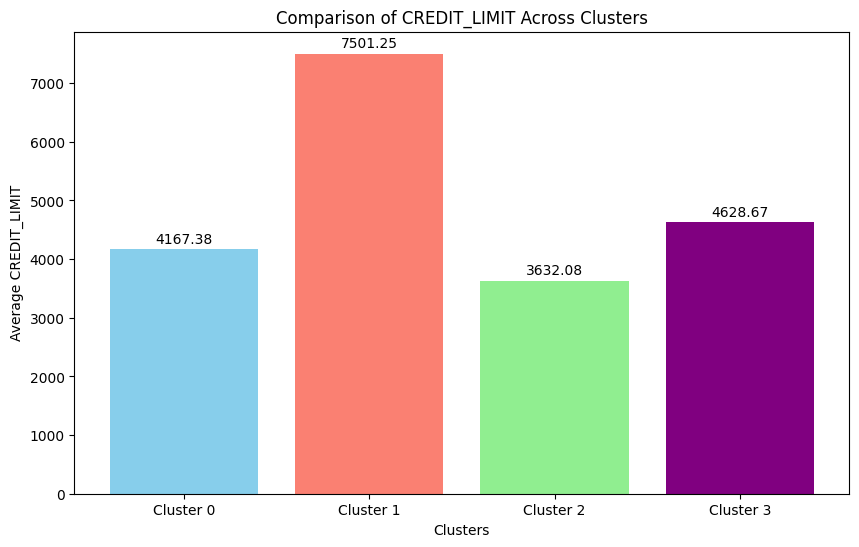

In [77]:
# Data CREDIT_LIMIT untuk setiap cluster
clusters_sil = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
credit_limit_data = [4167.377470, 7501.250000, 3632.076744, 4628.666940]

plt.figure(figsize=(10, 6))
plt.bar(clusters_sil, credit_limit_data, color=['skyblue', 'salmon', 'lightgreen', 'purple'])
# Menambahkan nilai di atas setiap bar
for i, value in enumerate(credit_limit_data):
    plt.text(i, value + 100, str(round(value, 2)), ha='center')
plt.xlabel('Clusters')
plt.ylabel('Average CREDIT_LIMIT')
plt.title('Comparison of CREDIT_LIMIT Across Clusters')
plt.show()

**_Statement_**:

Berdasarkan dataframe & visualisasi di atas diperoleh 4 cluster hasil dari model KMeans Silhouette Method, dengan ciri-ciri setiap cluster sebagai berikut:

- Cluster 0 : 1840 nasabah
    - Cluster 0 merupakan cluster dengan total jumlah nasabah yang paling banyak dibandingkan cluster lainnya. Cluster ini rata-rata memiliki jumlah saldo (Balance) didalam akunnya yang sedang yaitu $1864. Nasabah pada cluster 0 ini tidak konsumtif dalam menggunakan kartu kredit mereka. Hal ini ditunjukkan dari jumlah pembelian (purchases) mereka yang paling sedikit, yaitu $192 dengan rata-rata jumlah transaksi pembelian (purchases_trx) sebanyak 1-2 kali transaksi.

- Cluster 1 : 480 nasabah
    - Cluster 1 merupakan cluster dengan  total jumlah nasabah yang paling sedikit dibandingkan cluster lainnya. Nasabah pada cluster ini lebih konsumtif dalam menggunakan kartu kredit mereka. Hal ini ditunjukkan dari (Purchases_Frequency) frekuensi pembelian yang paling besar yaitu 96%, jumlah pembelian (purchases) mereka yang paling besar yaitu $4568 dengan (purchases_trx) rata-rata jumlah transaksi pembelian sebanyak 64 kali transaksi. Pada cluster ini (Balance) jumlah saldo pada akunnya paling besar dari cluster lainnya sebesar $2795.

- Cluster 2 : 1004 nasabah
    - (3) Cluster 2 merupakan cluster dengan total jumlah nasabah yang sedang, yang tidak yang paling banyak dan tidak paling sedikit, namun diatas culster 3. Cluster ini rata-rata memiliki (Balance) jumlah saldo didalam akunnya yang paling sedikit yaitu $913 dan cluster 2 ini Cluster jumlah pembelian (purchases) mereka bernilai $807 dan (credit limit) pada pada cluster 3 ini paling sedikit yaitu $3632

- Cluster 3 : 996 nasabah
    - (1) Cluster 1 merupakan cluster dengan total jumlah nasabah yang sedang, yang jumlahnya tidak yang paling banyak dan tidak paling sedikit. Cluster ini rata-rata memiliki (Balance) jumlah saldo didalam akunnya yang sedang namun lebih besar dari cluster 2 dan lebih kecil dari saldo cluster 0 yaitu dengan jumlah saldo dalam akunnya $1237 dan cluster 3 ini (credit limit) paling besaryaitu sebesar $4628.

- Mayoritas nasabah pada semua cluster lebih memilih tenure 12 bulan. Tenure yang lama juga memudahkan para nasabah dalam mengatur keuangan mereka, sehingga tidak terlalu membebani keuangan mereka.

# 9. Model Analysis

- Dari Model K-means 3 cluster dg elbow method kelebihannya: 
    - Jumlah cluster yang optimal dapat membantu dalam memberikan pemahaman yang lebih baik tentang variasi dalam perilaku pengguna kartu kredit.
    - Memungkinkan bank untuk membuat strategi pemasaran yang lebih terarah dan layanan yang disesuaikan berdasarkan kebutuhan setiap kelompok.
- Dari Model K-means 3 cluster dg elbow method kekurangannya: 
    - Kelemahan dari elbow method adalah sifatnya yang relatif dan tergantung pada interpretasi subjektif dari siku pada grafik.
    - Ada kemungkinan bahwa beberapa kelompok mungkin tidak cukup terdefinisi dengan baik, terutama jika data memiliki struktur yang kompleks.
-  Dari Model K-means 4 cluster dg silhoutte method kelebihannya:
    - Memiliki lebih banyak kelompok dapat memberikan pemahaman yang lebih rinci tentang perbedaan dalam perilaku pengguna kartu kredit.
    - Dengan 4 cluster, bank dapat mengidentifikasi lebih banyak segmen pelanggan dengan karakteristik yang berbeda
-  Dari Model K-means 4 cluster dg silhoutte method kekurangannya:
    - Menjadi terlalu kompleks saat jumlah cluster meningkat, sehingga memerlukan analisis yang lebih cermat dan pemahaman bisnis yang lebih mendalam.
    - Cluster yang terlalu banyak 4 cluster bisa memperumit strategi pemasaran dan layanan pelanggan jika tidak dikelola dengan baik.
 
- Sehinggga jika menggunakan 4 cluster tidak dapat jelas dalam pembagian kelompoknya dan strategi dalam pemasarannya nanti terlalu ribet. 

- Sehingga pada kasus Customer Segmentation dari data kartu kredit sebuah bank ini cocoknya menggunakan 3 cluster karena dapat lebih jelas dalam pembagian clusternya terdapat kelompok yang kaya yang saldo dalam akunnya paling besar dan jumlah pembelian paling besar, ada kelompok yang menegah ayng rata-rata pembeliannya sedang dan kelompok miskin yang rata-rata pembelian paling kecil dan jumlah saldo di akunnya paling kecil.

# 10. Model Saving

In [60]:
df_ori.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [73]:
df_col_s = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
            'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
df_col_n = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']

In [74]:
import pickle
import json

with open('model_kmean_3cluster.pkl', 'wb') as file_1: # ini nama file
  pickle.dump(km_el, file_1) # ini nama model

with open('model_scaler.pkl', 'wb') as file_2: # ini nama file
  pickle.dump(scaler, file_2) # ini nama scaler

with open('model_scaler_n.pkl', 'wb') as file_3: # ini nama file
  pickle.dump(scaler_n, file_3) # ini nama scaler nominal
  
with open('list_columns_s.txt', 'w') as file_4: # ini nama file
  json.dump(df_col_s, file_4) # ini nama kolom 

with open('list_columns_n.txt', 'w') as file_5: # ini nama file
  json.dump(df_col_n, file_5) # ini nama kolom 

In [69]:
# Mengambil data random dari hasil data final

df_ori[:5].to_dict()

{'CUST_ID': {0: 3091, 1: 5069, 2: 6075, 3: 6291, 4: 7755},
 'BALANCE': {0: 3.833185, 1: 0.0, 2: 757.964752, 3: 264.566591, 4: 440.613643},
 'BALANCE_FREQUENCY': {0: 0.125, 1: 0.0, 2: 0.875, 3: 0.375, 4: 1.0},
 'PURCHASES': {0: 45.0, 1: 176.03, 2: 157.4, 3: 1150.0, 4: 600.0},
 'ONEOFF_PURCHASES': {0: 45.0, 1: 176.03, 2: 157.4, 3: 1150.0, 4: 600.0},
 'INSTALLMENTS_PURCHASES': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'CASH_ADVANCE': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'PURCHASES_FREQUENCY': {0: 0.125, 1: 0.125, 2: 0.125, 3: 0.125, 4: 0.125},
 'ONEOFF_PURCHASES_FREQUENCY': {0: 0.125,
  1: 0.125,
  2: 0.125,
  3: 0.125,
  4: 0.125},
 'PURCHASES_INSTALLMENTS_FREQUENCY': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'CASH_ADVANCE_FREQUENCY': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'CASH_ADVANCE_TRX': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 'PURCHASES_TRX': {0: 1, 1: 1, 2: 6, 3: 1, 4: 1},
 'CREDIT_LIMIT': {0: 500.0, 1: 7000.0, 2: 1200.0, 3: 1200.0, 4: 1000.0},
 'PAYMENTS': {0: 0.0, 1: 0.0, 2

# 11. Conclusions

Kesimpulan dari Tim Data Scientist lakukan adalah:

1. Setelah melakukan beberapa analisa dari hasil cluster evaluasi dan visualisasi cluster yang terbentuk, maka model terbaik untuk dataset yang disediakan adalah KMeans dengan elbow method cluster 3.

2. Hasil cluster yang terbentuk dari model di atas sebanyak 3 cluster dengan kesimpulan:

    - Cluster 0 merupakan cluster dengan total jumlah nasabah kelompok menengah dibandingkan dengan cluster 1 dan cluster 2 yaitu sebanyak 1405 nasabah. Nasabah pada cluster ini lebih konsumtif dalam menggunakan kartu kredit mereka. Hal ini ditunjukkan dari jumlah pembelian (purchases) mereka yang paling besar, $2003 dengan (purchases_trx) rata-rata jumlah transaksi pembelian sebanyak 34 kali transaksi & frekuensi pembelian (Purchases_Frequency) yang paling besar yaitu 95%.

    - Cluster 1 merupakan cluster 
    dengan jumlah nasabah terbanyak dibanding dengan cluster lainnya yaitu sebanyak 1874 nasabah. Nasabah pada cluster ini melakukan jumlah pembelian (purchases) paling sedikit dengan rata-rata pembelian sebesar $1999 dan rata-rata jumlah transaksi hanya 1-2 kali. Cluster ini juga memiliki credit limit yang paling sedikit yaitu $4169.

    - Cluster 2 merupakan cluster merupakan cluster dengan jumlah nasabah paling sedikit dibanding dengan cluster lainnya yaitu sebanyak 1041 nasabah. Cluster 2 merupakan cluster dengan jumlah pembelian (purchases) kelompok menengah apabila dibandingkan dengan cluster 0 dan cluster 1. dengan rata-rata pembelian sebesar $1194 dan rata-rata jumlah transaksi hanya 14-15 kali. Mereka juga lebih banyak melakukan pembelian dengan sistem lunas (oneoff) dibandingkan dengan cicilan (installments).Nasabah pada cluster ini lebih seimbang dan aktif dalam menggunakan kartu kredit mereka, baik dalam hal melakukan pembelian maupun penarikan uang tunai. Jadi, nasabah pada cluster ini adalah nasabah yang lebih bijak dalam menggunakan kartu kredit mereka.

3. Starategi marketing yang dapat dilakukan tiap cluster adalah:

    - Claster 0 

    Claster ini sebagai contoh nasabah yang terbiasa menggunakan kartu kredit, baik dibayar langsung maupun dicicil dalam jangka waktu tertentu. Cluster ini dapat diberikan penawaran untuk meningkatkan limit kartu kredit, dan bank diharapkan dapat memberikan penawaran terkait loyalitas nasabah bank jangka panjang agar nasabah tetap menggunakan kartu kredit Bank untuk bertransaksi. Selain itu, layanan premium juga dapat ditawarkan, yaitu  menawarkan layanan premium atau produk eksklusif kepada pelanggan di cluster ini.

    - Claster 1
    
    Dapat mengadakan promosi atau campign untuk mendorong pelanggan melakukan pembayaran kartu kredit, terutama pelanggan yang  belum pernah melakukan transaksi. Bank dapat menawarkan cicilan bunga 0%. Selain itu, Bank memberikan kemudahan dalam pembayaran tagihan kartu kredit dan mengedukasi nasabah khususnya nasabah yang masih takut menggunakan kartu kredit karena takut melebihi limit.

    - Claster 2 

    Dapat dilakukan penawaran diskon atau penawaran khusus untuk memanfaatkan saldo yang tersisa dalam akun mereka. Selanjutnya, promosi pada produk tertentu, fokuskan pada promosi produk atau layanan yang sesuai dengan sisa saldo rendah nasabah dalam cluster ini.

# 12. Conceptual Answer

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means?

**Jawab**: KMeans inertia adalah metric yang dikenal sebagai Sum of Squares Errors (atau SSE), berfungsi untuk menghitung jumlah jarak semua titik dalam cluster dari titik pusat(centroid). Semakin kecil nilai inertia maka nilai K menjadi lebih optimal. 


2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll)!

**Jawab**:

- K-Means adalah algoritma pengelompokan berbasis centroid yang bertujuan untuk mempartisi sebuah dataset menjadi K cluster yang berbeda dan tidak tumpang tindih (hard clustering).

- Cara penggunaan:
    
    1. Lakukan K-Means dengan Jumlah Cluster yang Berbeda
    2. Hitung Inertia untuk Setiap k
    3. Gambarkan grafik yang menunjukkan jumlah cluster (k) pada sumbu x dan nilai inertia pada sumbu y.
    4. Identifikasi titik pada grafik di mana penurunan inertia membentuk siku. Siku ini menunjukkan jumlah cluster yang optimal.

- Kelebihan: 

    1. Sederhana dan cocok untuk dataset yang besar.
    2. Dijamin akan konvergen dalam jumlah langkah yang terbatas (biasanya iterasi yang cukup kecil).
    3. Salah satu algoritma pengelompokan tercepat.

- Kekurangan: 

    1. Sensitif terhadap tempat awal centroid, yang dapat menyebabkan hasil yang berbeda untuk inisialisasi yang berbeda.
    2. Mengasumsikan cluster berbentuk bola, berukuran sama, dan memiliki kepadatan yang sama.
    3. Jumlah cluster (K) harus ditentukan di awal sebelum pengelompokan dimulai.
    4. Sensitif terhadap outlier.
    5. K-Means dirancang untuk fitur yang berkelanjutan. Ini mungkin tidak bekerja dengan baik untuk fitur kategorikal yang telah mengalami pengkodean fitur.

 
